<a href="https://colab.research.google.com/github/Kasula-Lohith-Kumar/ScalerProjects/blob/main/LoanTapBusinessCaseLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3p4Wv0GQLyfCI7NaER4kn9TIn6etYSdCPJQ&s">
        </td>
        <td>
            <div align="center">
              <font color="#662f96" size="8"><span><b>Business</b></span></font><font color="#943699" size="8"><span><b>Case</b></span></font>
                <br>
                <br>
                <br>
                <font color="grey" size="4">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>


#<font color="#662f96"><span><b>Con</b></span></font><font color="#943699" ><span><b>text :</b></span></font>

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

#<font color="#662f96"><span><b>Problem </b></span></font><font color="#943699" ><span><b>Statement :</b></span></font>

Given a set of attributes for an Individual, need to determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

#<font color="#662f96"><span><b>Column </b></span></font><font color="#943699" ><span><b>Profiling :</b></span></font>

**loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**term :**The number of payments on the loan. Values are in months and can be either 36 or 60.   

**int_rate :** Interest Rate on the loan  

**installment :** The monthly payment owed by the borrower if the loan originates.  

**grade :** LoanTap assigned loan grade  

**sub_grade :** LoanTap assigned loan subgrade  

**emp_title :**The job title supplied by the Borrower when applying for the loan.

**emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report.

**annual_inc :** The self-reported annual income provided by the borrower  during registration.

**verification_status :** Indicates if income was verified by LoanTap, not verified, or if the income source was verified

**issue_d :** The month which the loan was funded

**loan_status :** Current status of the loan - Target Variable

**purpose :** A category provided by the borrower for the loan request.

**title :** The loan title provided by the borrower

**dti :** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line :**The month the borrower's earliest reported credit line was opened

**open_acc :** The number of open credit lines in the borrower's credit file.

**pub_rec :** Number of derogatory public records

**revol_bal :** Total credit revolving balance

**revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc :** The total number of credit lines currently in the borrower's credit file

**initial_list_status :** The initial listing status of the loan. Possible values are – W, F

**application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers

**mort_acc :** Number of mortgage accounts.

**pub_rec_bankruptcies :** Number of public record bankruptcies

**Address:** Address of the individual


#<font color="#662f96"><span><b>Importing all the </b></span></font><font color="#943699" ><span><b>requried libraries</b></span></font>


##<font color="#1b6344"><span><b>Installing additional packages</b></span></font>

In [ ]:
!pip install colorama
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pickle
import re
import statsmodels.api as sm
from scipy.stats import ttest_ind, ttest_rel, chi2, chi2_contingency, chisquare, \
f_oneway, spearmanr, pearsonr, norm, shapiro, kstest
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from colorama import Fore, Back, Style
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import warnings
from imblearn.over_sampling import SMOTE

#<font color="#662f96"><span><b>Mounting the </b></span></font><font color="#943699" ><span><b>Google Drive</b></span></font>

In [ ]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/BusinessCases/DataSets/LoanTapBusinessCase/logistic_regression.csv')
dataset.head()

Mounted at /content/drive


loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

#<font color="#662f96"><span><b>Basic analysis on </b></span></font><font color="#943699" ><span><b>the given dataset</b></span></font>


In [ ]:
dataset.shape

(396030, 27)

<font color = 'blue'>Observation:</font>

Total Samples: <font color ='red'>396030  </font>

 Given Features: <font color ='red'>27 </font>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<font color = 'blue'>Observation :</font> There are no trailing or leading white spaces for the column names

In [ ]:
df_null_values = np.round((dataset.isna().sum()/len(dataset) * 100), 2)
df_null_values = df_null_values.reset_index().rename(columns={'index':'column_name', 0:'percentage'})
df_null_values

column_name  percentage
0              loan_amnt        0.00
1                   term        0.00
2               int_rate        0.00
3            installment        0.00
4                  grade        0.00
5              sub_grade        0.00
6              emp_title        5.79
7             emp_length        4.62
8         home_ownership        0.00
9             annual_inc        0.00
10   verification_status        0.00
11               issue_d        0.00
12           loan_status        0.00
13               purpose        0.00
14                 title        0.44
15                   dti        0.00
16      earliest_cr_line        0.00
17              open_acc        0.00
18               pub_rec        0.00
19             revol_bal        0.00
20            revol_util        0.07
21             total_acc        0.00
22   initial_list_status        0.00
23      application_type        0.00
24              mort_acc        9.54
25  pub_rec_bankruptcies        0.14
26               address        0.00

<font color = 'blue'>Observation :</font> Found Null values for the columns **emp_title, emp_length, title, revol_util, mort_acc, & pub_rec_bankruptcies**

In [ ]:
dataset.duplicated().sum()

0

<font color = 'blue'>Observation :</font> No duplicate data samples.

In [ ]:
dataset.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [ ]:
dataset.describe(include='object')

term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   

                     title earliest_cr_line initial_list_status  \
count               394274           396030              396030   
unique               48816              684                   2   
top     Debt consolidation         Oct-2000                   f   
freq                152472             3017              238066   

       application_type                      address  
count            396030                       396030  
unique                3                       393700  
top          INDIVIDUAL  USCGC Smith\r\nFPO AE 70466  
freq             395319                            8

In [ ]:
pd.set_option('display.max_columns', 30)
dataset.head(2)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   

    issue_d loan_status             purpose               title    dti  \
0  Jan-2015  Fully Paid            vacation            Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation  Debt consolidation  22.05   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113

##<font color="#1b6344"><span><b>Unique values of all the categorical columns</b></span></font>

In [ ]:
objectTypeFeatures = []
for i in dataset.columns:
  if dataset[i].dtype == 'object':
    objectTypeFeatures.append(i)
print(Fore.RED, 'Categorical Features:')
for i in objectTypeFeatures:
  print(Fore.BLUE,i)

 Categorical Features:
 term
 grade
 sub_grade
 emp_title
 emp_length
 home_ownership
 verification_status
 issue_d
 loan_status
 purpose
 title
 earliest_cr_line
 initial_list_status
 application_type
 address


In [ ]:
for _ in objectTypeFeatures:
  print(f'{Fore.GREEN}+-'*50)
  print(f'{Fore.RED}{_}:')
  print(f'{Fore.MAGENTA}Length : {Fore.BLUE} {dataset[_].nunique()}')
  print(f'{Fore.MAGENTA}Values : {Fore.BLUE} {dataset[_].unique()}')

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
term:
Length :  2
Values :  [' 36 months' ' 60 months']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
grade:
Length :  7
Values :  ['B' 'A' 'C' 'E' 'D' 'F' 'G']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
sub_grade:
Length :  35
Values :  ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
emp_title:
Length :  173105
Values :  ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
emp_lengt

<font color = 'blue'>Observation:</blue>

* <font color = 'magenta'>Orinal Categories:</font>

   * **term :** Target encoding is appropriate.
   * **grade :** Target encoding is appropriate.
   * **sub_grade :** Target encoding is appropriate.
   * **emp_length :** Target encoding is appropriate.


* <font color = 'magenta'>Nomial Categories:</font>
    
    * **emp_title :** **173105** unique values, mean encoding is appropriate.
    * **purpose :** **14** unique values, mean encoding is appropriate.
    * **title :** **48816** unique values, mean encoding is appropriate.
    * **initial_list_status :** only **2** unique values, one-hot encoding is appropriate.
    * **application_type** **3** unique values are there, mean or one-hot encoding can be used.
    * **address :** **393700** unique values, we can drop this feature.
    * **home_ownership :** **6** unique values, mean encoding is appropriate.
    * **verification_status :** **3** unique values are there, mean or one-hot encoding can be used.
    * **address :** **393700** unique values, we can drop this feature.
    * **issue_d :** **115** unique values, mean encoding can be used.
    * **loan_status :** This is the target Feature
    * **earliest_cr_line :** **684** unique values, mean encoding can be used.

#<font color="#662f96"><span><b>Univariate </b></span></font><font color="#943699" ><span><b>Analysis</b></span></font>

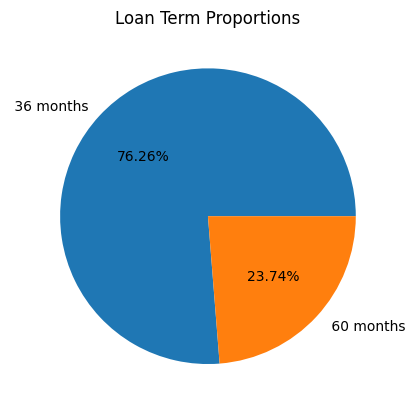

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [ ]:
df_term = dataset['term'].value_counts()
plt.pie(df_term, labels = df_term.index, autopct='%0.2f%%')
plt.title('Loan Term Proportions')
plt.show()
df_term

<font color='blue'>Observation:</font>
* **76.26%** of loans were given for 36 months terms
* **23.74%** of loans were given for 60 months terms

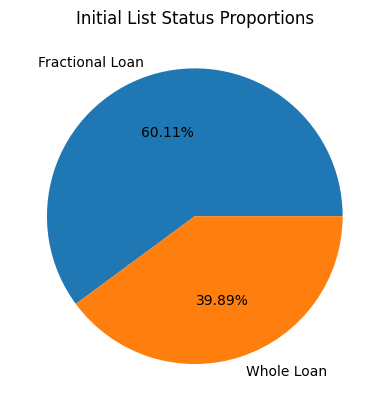

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [ ]:
df_init_lst_status = dataset['initial_list_status'].value_counts()
df_init_lst_status

plt.pie(df_init_lst_status, labels = ['Fractional Loan', 'Whole Loan'], autopct='%0.2f%%')
plt.title('Initial List Status Proportions')
plt.show()
df_init_lst_status

<font color='blue'>Observation:</font>
* **60.11%** of loans are fractional whereas 39.89% are whole loans.

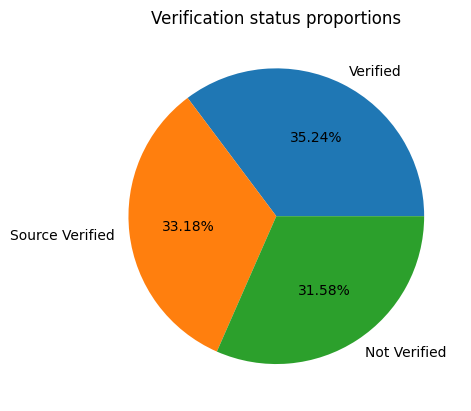

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [ ]:
df_verify_status = dataset['verification_status'].value_counts()
df_verify_status

plt.pie(df_verify_status, labels = df_verify_status.index, autopct='%0.2f%%')
plt.title('Verification status proportions')
plt.show()
df_verify_status

<font color='blue'>Observation:</font>
* Verified, Source Verified and Not Verified are approximately equal in proportion.

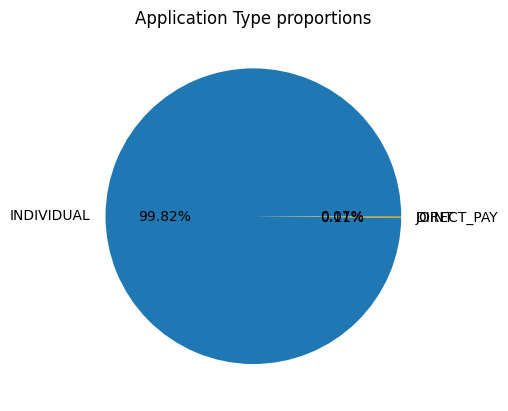

application_type   count    Percent
0       INDIVIDUAL  395319  99.820468
1            JOINT     425   0.107315
2       DIRECT_PAY     286   0.072217

In [ ]:
#application_type
df_apply_type= dataset['application_type'].value_counts()
plt.pie(df_apply_type, labels = df_apply_type.index, autopct='%0.2f%%')
plt.title('Application Type proportions')
plt.show()
df_apply_type = df_apply_type.reset_index()
df_apply_type['Percent'] = df_apply_type['count'].astype('int')/sum(df_apply_type['count'])*100
df_apply_type

<font color='blue'>Observation:</font>
* Most of the loans are 'Individual'(**99.82%**) loans and very few are joint and direct pay.

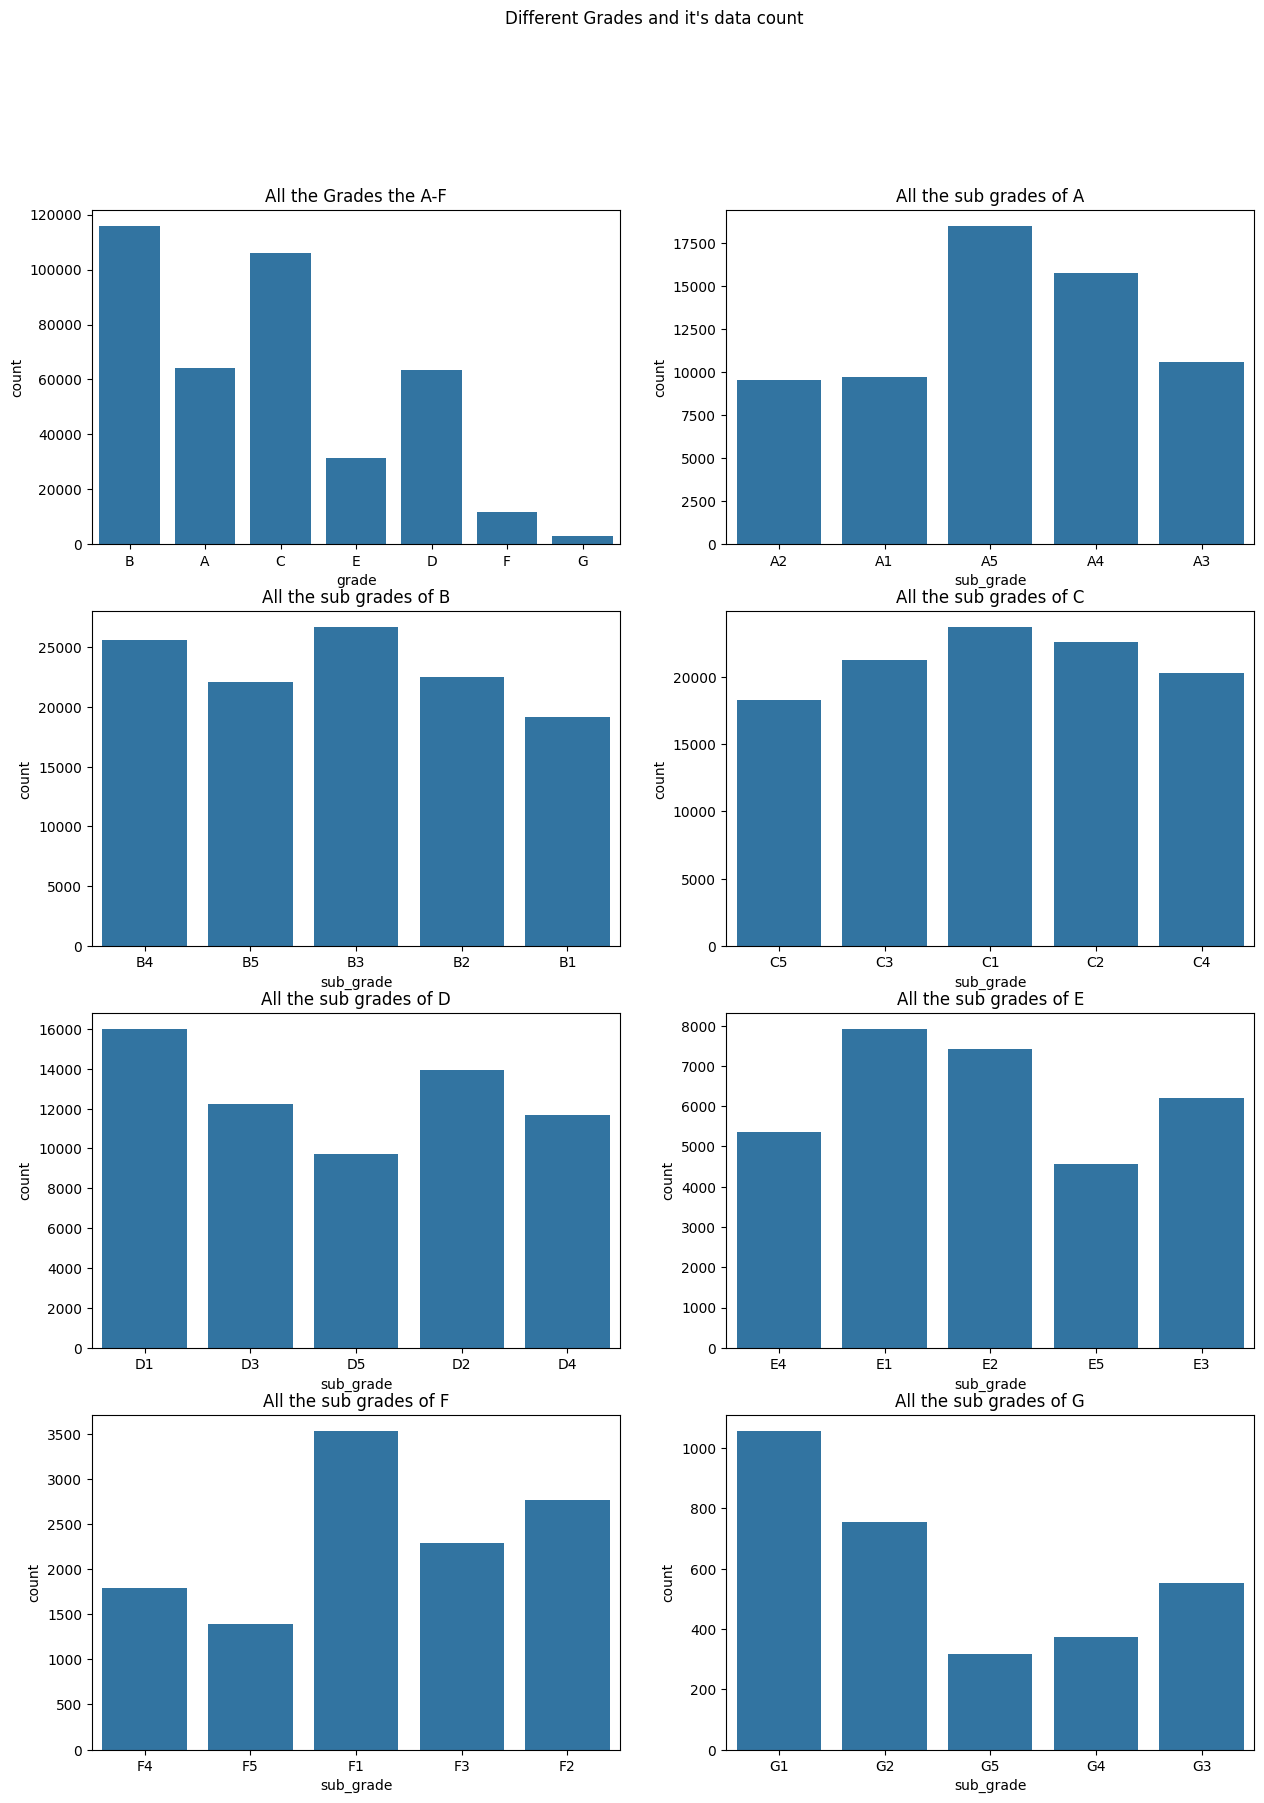

In [ ]:
grades = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='str').reshape(7,1)
values = np.array([1,2,3,4,5,6,7], dtype='str').reshape(1,7)
subGrades = np.char.add(grades, values)
plt.figure(figsize=(15,20))
plt.subplot(4, 2, 1)
plt.suptitle("Different Grades and it's data count")
plt.title("All the Grades the A-F")
sns.countplot(data=dataset, x='grade')
plt.subplot(4, 2, 2)
plt.title("All the sub grades of A")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[0,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 3)
plt.title("All the sub grades of B")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[1,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 4)
plt.title("All the sub grades of C")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[2,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 5)
plt.title("All the sub grades of D")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[3,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 6)
plt.title("All the sub grades of E")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[4,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 7)
plt.title("All the sub grades of F")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[5,:].flatten())], x='sub_grade')
plt.subplot(4, 2, 8)
plt.title("All the sub grades of G")
sns.countplot(data=dataset[dataset['sub_grade'].isin(subGrades[6,:].flatten())], x='sub_grade')
plt.show()

<font color='blue'>Observation:</font>

**All Grades (A-F):**

* Grade B has the highest count, followed by E and A.
* Grades D and C have moderate counts.
* Grades F and G have the lowest counts, with G being the smallest.

**Subgrades:**

* A: Subgrade A5 has the highest count, with subgrades A1 and A4 following.
* B: Subgrade B3 has the highest count, closely followed by B4, with the remaining subgrades slightly lower.
* C: Subgrades C3 and C1 have similar high counts, while C4, C5, and C2 have lower but fairly even distributions.
* D: D1 has the highest count, with D5 the lowest among D subgrades.
* E: Subgrade E1 has the highest count, while E3 has the lowest.
* F: Subgrade F1 has the highest count, with F4 being the lowest among F subgrades.
* G: Subgrade G1 has the highest count, with G3 having the lowest among G subgrades.

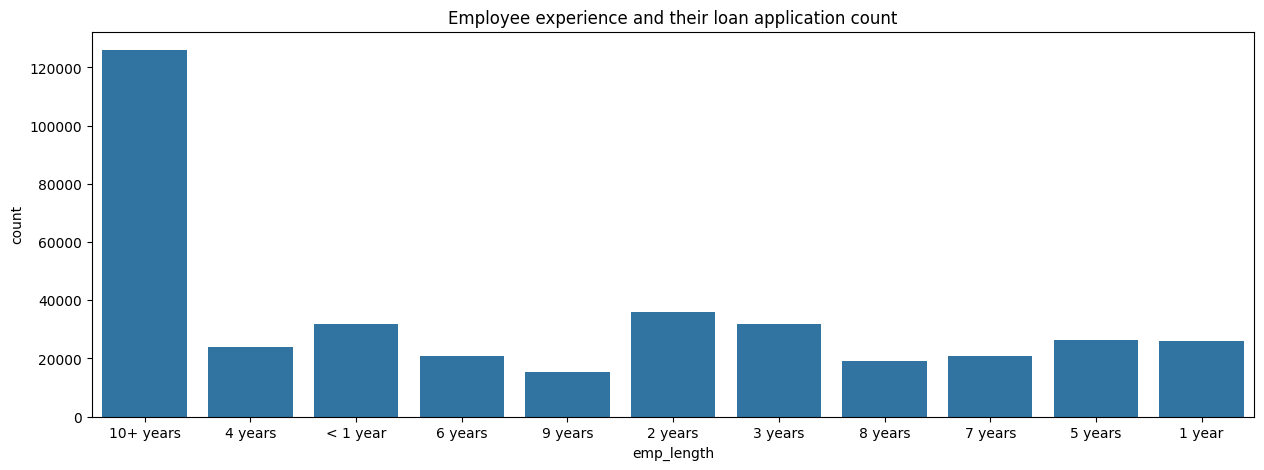

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='emp_length')
plt.title('Employee experience and their loan application count')
plt.show()

<font color='blue'>Observation:</font>
* Employees with 10+ years of experience have the highest number of loan applications.
* The number of loan applications generally decreases as the employee experience decreases.
* Employees with less than 1 year of experience have the second-highest number of loan applications.
* Employees with 4 years of experience have the third-highest number of loan applications.
* The number of loan applications for employees with 6, 9, 2, 3, 8, 7, and 5 years of experience are relatively similar.

Overall, the chart suggests that employees with more experience tend to apply for fewer loans, while those with less experience apply for more loans.










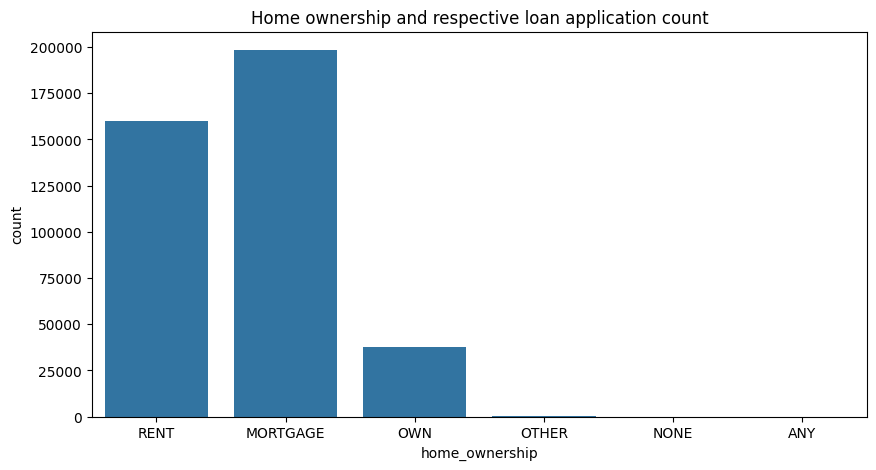

In [ ]:
#home_ownership

plt.figure(figsize=(10,5))
sns.countplot(data=dataset, x='home_ownership')
plt.title('Home ownership and respective loan application count')
plt.show()

<font color='blue'>Observation:</font>
* Employees who rent their homes have the highest number of loan applications.
* Employees who have a mortgage have the second-highest number of loan applications.
* Employees who own their homes outright have the third-highest number of loan applications.
* The number of loan applications is significantly lower for employees who have "other," "none," or "any" as their home ownership status.

Overall, the chart suggests that employees who rent or have a mortgage are more likely to apply for loans compared to those who own their homes outright or have other home ownership statuses.

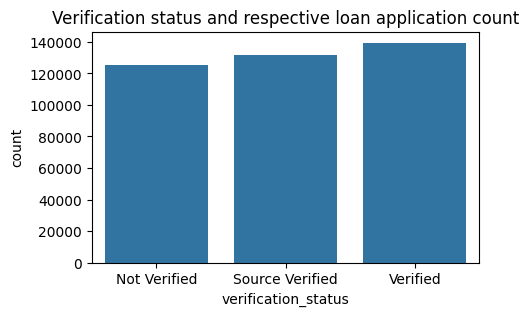

In [ ]:
#verification_status

plt.figure(figsize=(5,3))
sns.countplot(data=dataset, x='verification_status')
plt.title('Verification status and respective loan application count')
plt.show()

<font color='blue'>Observation:</font>
* The number of loan applications is highest for verified applications.
* The number of loan applications is second highest for source verified applications.
* The number of loan applications is lowest for not verified applications.

Overall, the chart suggests that the more verified an application is, the higher the number of loan applications.

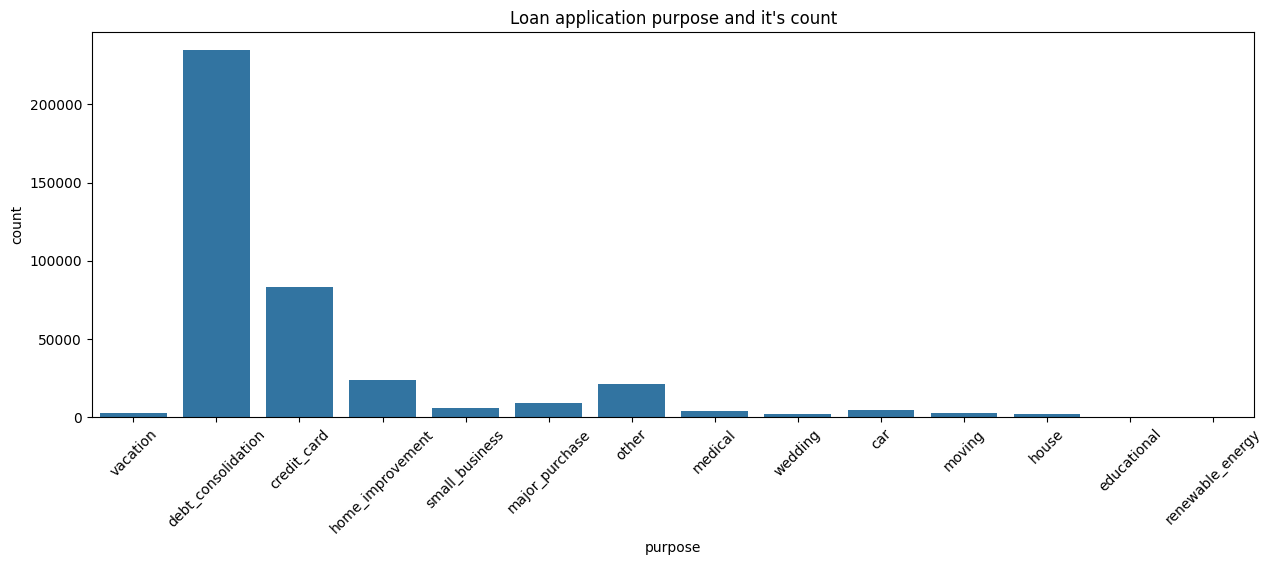

In [ ]:
#purpose

plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='purpose')
plt.xticks(rotation=45)
plt.title("Loan application purpose and it's count")
plt.show()

<font color='blue'>Observation:</font>
* Debt consolidation is the most common purpose for loan applications.
* Credit card and home improvement are the second and third most common purposes for loan applications.
* Other purposes such as vacation, small business, major purchase, other, medical, wedding, moving, house, educational, and renewable energy have significantly fewer loan applications compared to debt consolidation, credit card, and home improvement.  

Overall, the chart suggests that most loan applications are for debt consolidation, credit card, and home improvement purposes.










In [ ]:
def hist_with_annotation(dataframe, xaxis, binwidth=None, fs=None, plot_title=None):
  plt.figure(figsize=fs)
  ax = sns.histplot(data=dataframe, x=xaxis, binwidth=binwidth, kde=True)
  plt.title(plot_title)
  for _ in ax.patches:
    x = _.get_x()
    y = _.get_height()
    w = _.get_width()
    p = (x+w/2, y)
    ax.annotate(y, p, ha = 'center', va ='bottom')
  plt.show()

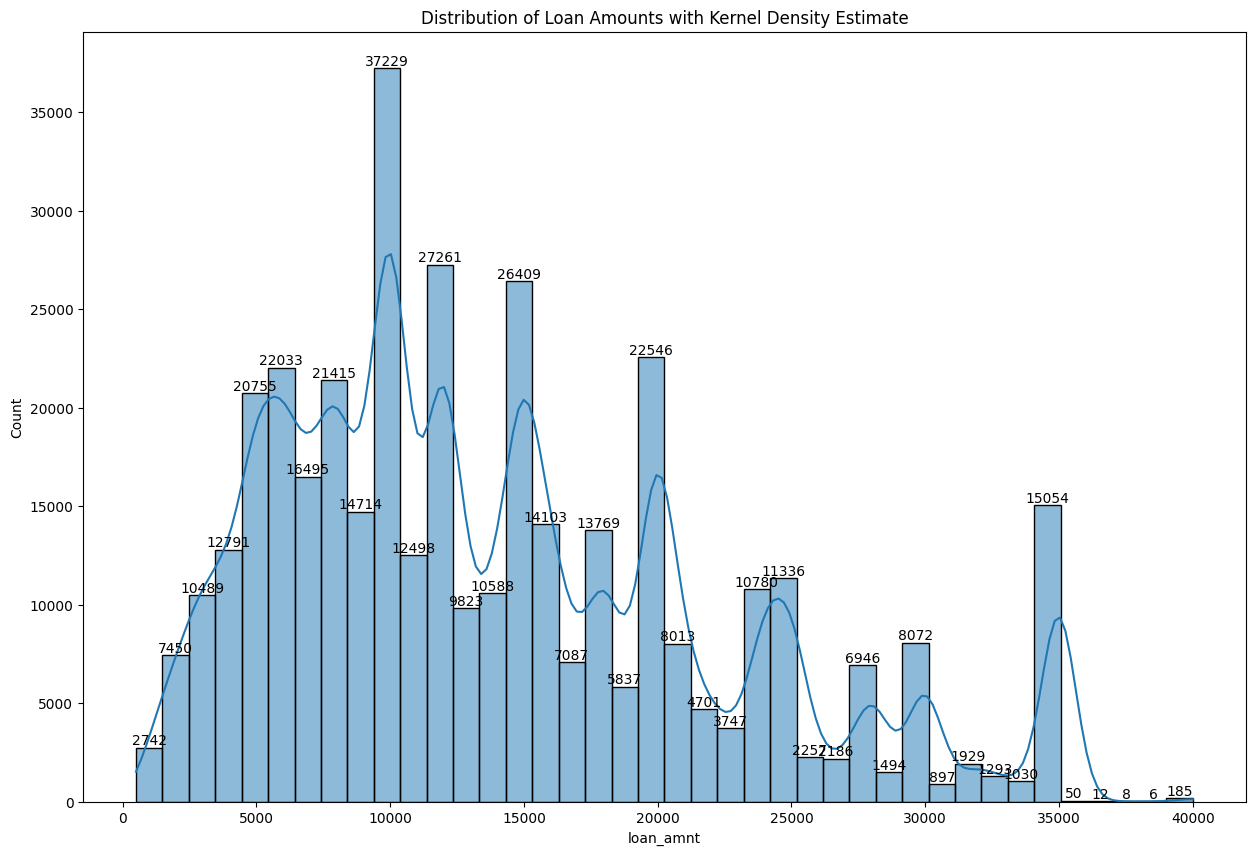

In [ ]:
title = 'Distribution of Loan Amounts with Kernel Density Estimate'
hist_with_annotation(dataset, 'loan_amnt', binwidth=1000, fs =(15,10), plot_title=title)

<font color='blue'>Observations:</font>

* The distribution shows multiple peaks, with the highest peak around 35,000, where the count reaches approximately 37,229.
* Several other high-count loan amounts are observed around 10,000, 15,000, 20,000, and 25,000, indicating popular loan amounts in these ranges.
* There is a general tapering in counts for loans greater than 30,000, except for a secondary peak around 35,000, possibly reflecting specific loan product preferences or caps.
* Smaller counts are observed in the 30,000 to 40,000 range, with the lowest at 40,000

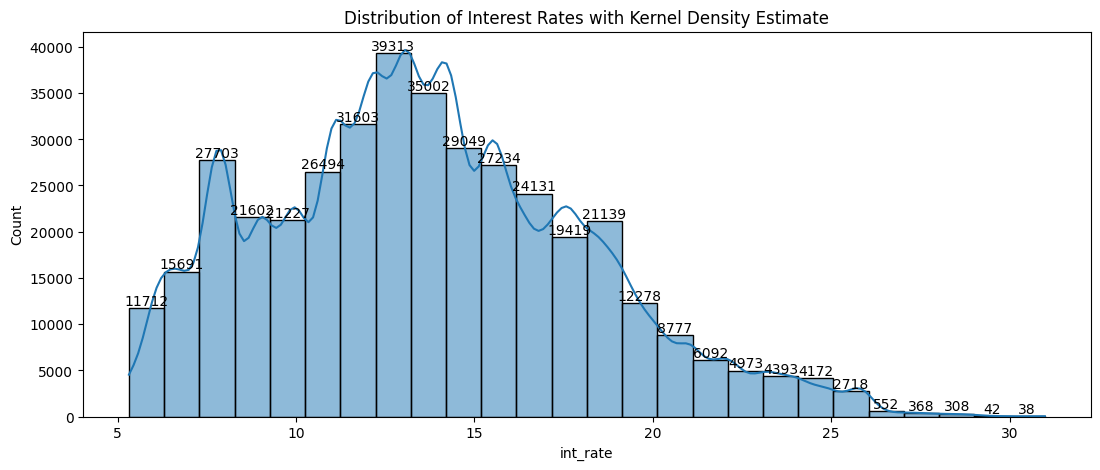

In [ ]:
title ='Distribution of Interest Rates with Kernel Density Estimate'
hist_with_annotation(dataset, 'int_rate', binwidth=1, fs=(13,5), plot_title=title)

<font color='blue'>Observations:</font>

* The distribution is roughly unimodal with a peak around 13-14%, where the count reaches the highest at 39,313.
* A significant portion of loans has interest rates between 5% and 20%, with counts gradually decreasing beyond 20%.
* There is a steep drop-off in counts for interest rates above 20%, with only a few loans above 25%, suggesting that high-interest loans are less common.


The overall shape indicates that most loans have interest rates concentrated around the central peak, with fewer loans at both lower and higher ends of the spectrum.

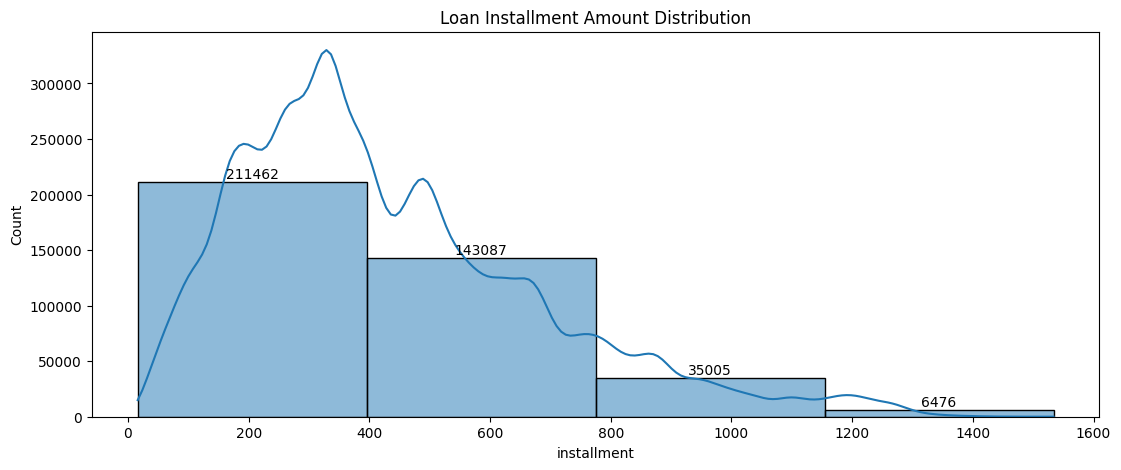

In [ ]:
title = 'Loan Installment Amount Distribution'
hist_with_annotation(dataset, 'installment', binwidth=365, fs=(13,5), plot_title=title)

<font color='blue'>Observations:</font>

* The distribution of loan installment amounts is right-skewed, meaning there are more loans with smaller installment amounts.
* The majority of loans have installment amounts between 0 and 400.
* There are fewer loans with installment amounts greater than 400.
* The chart shows a significant drop in the number of loans as the installment amount increases.


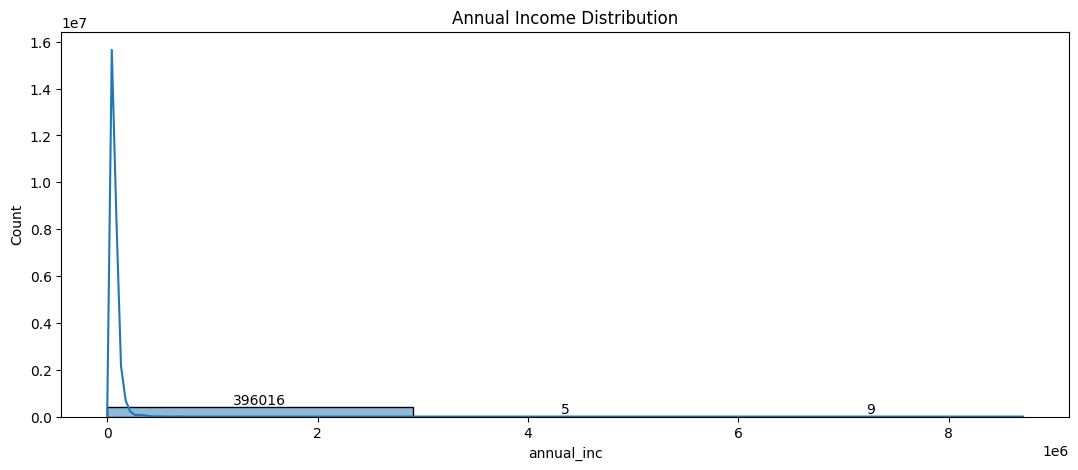

In [ ]:
title = "Annual Income Distribution"
hist_with_annotation(dataset, 'annual_inc', binwidth=3000000, fs=(13,5), plot_title=title)

<font color='blue'>Observations:</font>

* The distribution is highly right-skewed, meaning that most individuals have relatively low annual incomes.
* There are a few individuals with very high annual incomes, which are represented by the long tail on the right side of the distribution.
* The majority of individuals have annual incomes below 2 million.
* There is a significant drop in the number of individuals as the annual income increases.

Overall, the chart shows that annual income is not evenly distributed, with a large number of individuals having low incomes and a small number of individuals having very high incomes.

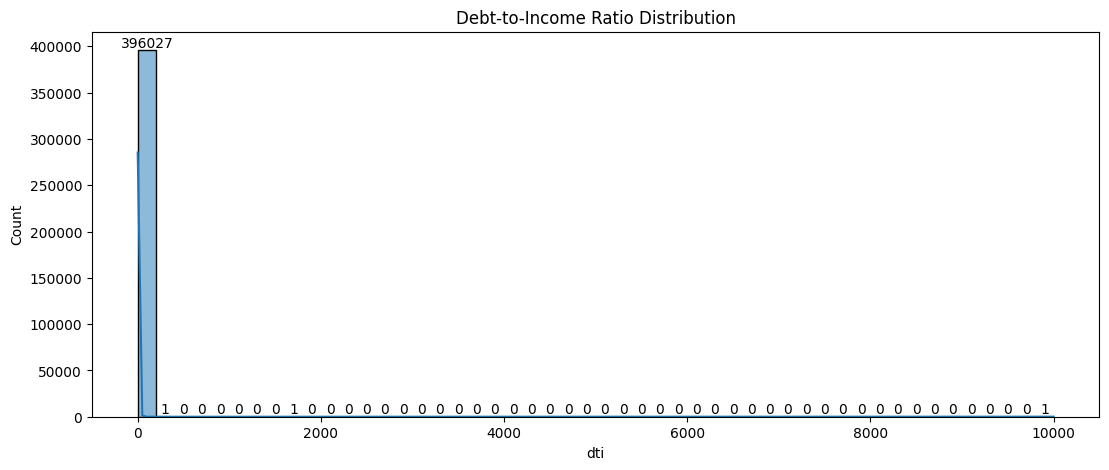

In [ ]:
title = 'Debt-to-Income Ratio Distribution'
hist_with_annotation(dataset, 'dti', binwidth=200,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>
* The distribution is highly right-skewed, with a large number of individuals having a DTI ratio of 0.
* There are a few individuals with higher DTI ratios, but the majority of individuals have a DTI ratio below 1000.
* The distribution is very sparse, with most of the bars having a count of 0.

Overall, the chart shows that most individuals have a low DTI ratio, indicating that they have a manageable amount of debt compared to their income.

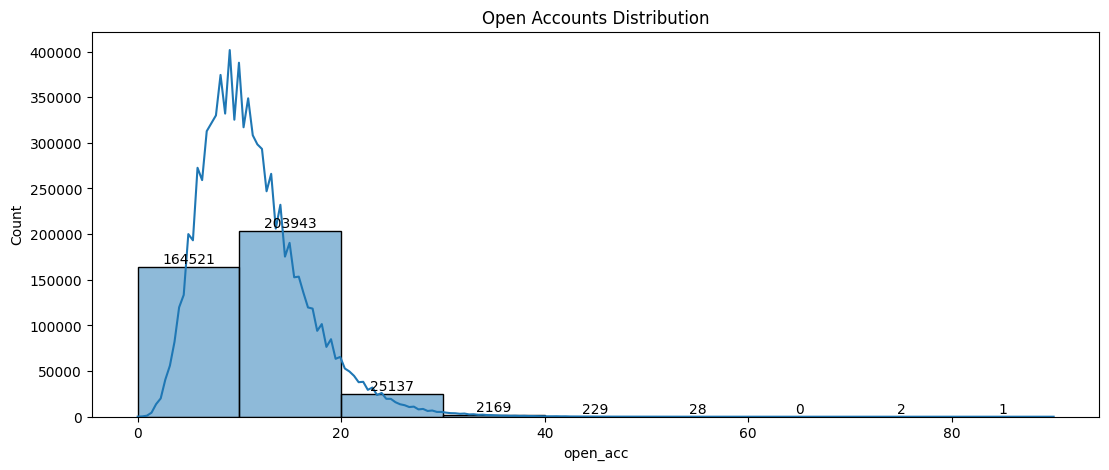

In [ ]:
#open_acc
title = 'Open Accounts Distribution'
hist_with_annotation(dataset, 'open_acc', binwidth=10,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>
* The distribution is right-skewed, meaning that most individuals have a relatively small number of open accounts.
* The majority of individuals have between 0 and 20 open accounts.
* There are a few individuals with a very large number of open accounts, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.

Overall, the chart shows that most individuals have a manageable number of open accounts. However, there are a few individuals with a very large number of open accounts, which could be a cause for concern.

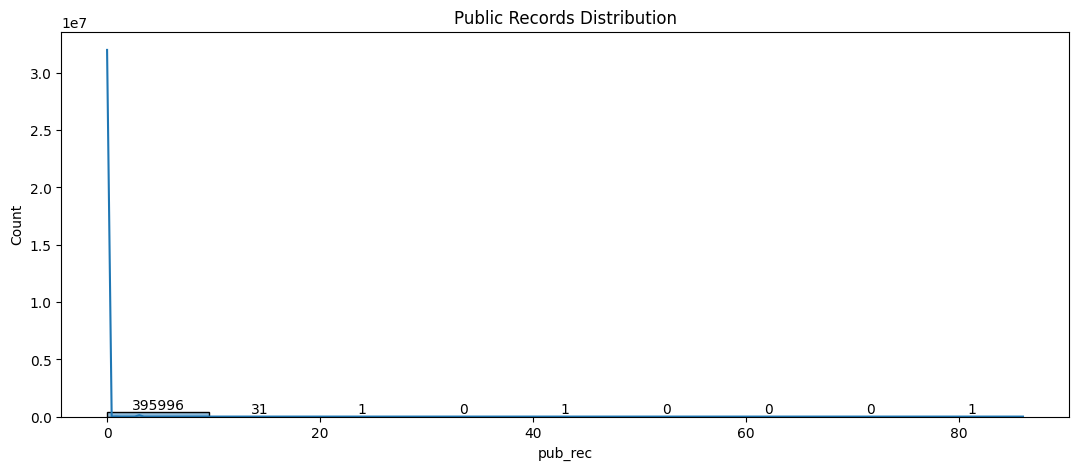

In [ ]:
#pub_rec
title = 'Public Records Distribution'
hist_with_annotation(dataset, 'pub_rec', binwidth=10,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>

* The distribution is highly right-skewed, meaning that most individuals have a very small number of public records.
* The majority of individuals have 0 public records.
* There are a few individuals with a larger number of public records, but the distribution is very sparse.

Overall, the chart shows that most individuals have a clean credit history with no public records. However, there are a few individuals with a larger number of public records, which could be a cause for concern.

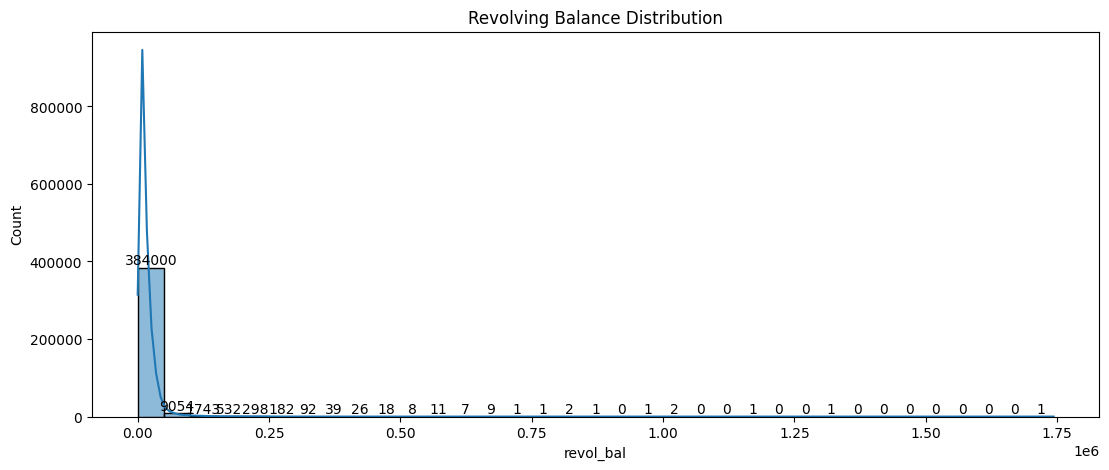

In [ ]:
#revol_bal
title = 'Revolving Balance Distribution'
hist_with_annotation(dataset, 'revol_bal', binwidth=50000,  fs=(13,5), plot_title=title)

<font color='blue'>Observations:</font>
* The distribution is highly right-skewed, meaning that most individuals have a low revolving balance.
* The majority of individuals have a revolving balance below 250,000.
* There are a few individuals with a very high revolving balance, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.

Overall, the chart shows that most individuals have a manageable revolving balance. However, there are a few individuals with a very high revolving balance, which could be a cause for concern.

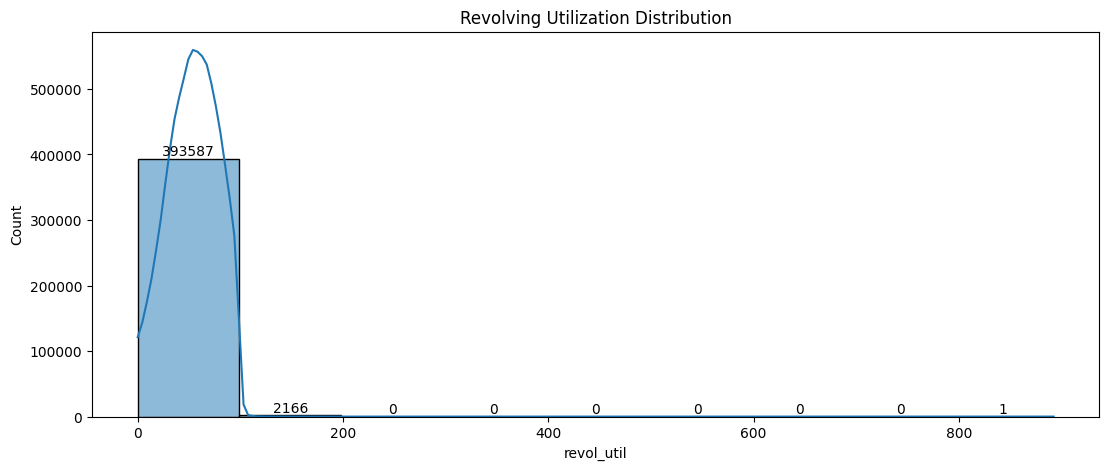

In [ ]:
#revol_util
title = 'Revolving Utilization Distribution'
hist_with_annotation(dataset, 'revol_util', binwidth=100,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>
* The distribution is highly right-skewed, meaning that most individuals have a low revolving utilization.
* The majority of individuals have a revolving utilization below 200.
* There are a few individuals with a very high revolving utilization, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.

Overall, the chart shows that most individuals have a manageable revolving utilization. However, there are a few individuals with a very high revolving utilization, which could be a cause for concern.

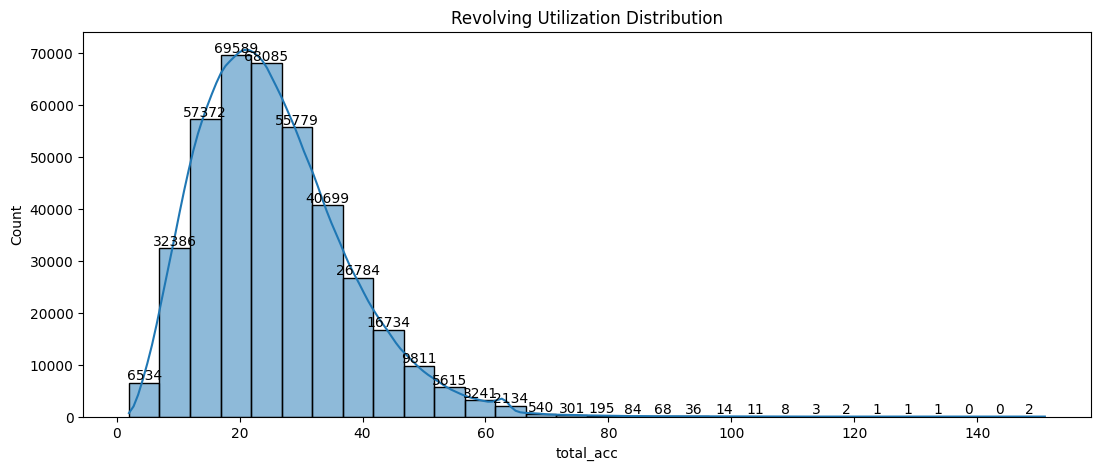

In [ ]:
#total_acc
TITLE = 'Total Accounts Distribution'
hist_with_annotation(dataset, 'total_acc', binwidth=5,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>

* The distribution is right-skewed, meaning that most individuals have a relatively small number of total accounts.
* The majority of individuals have between 0 and 20 total accounts.
* There are a few individuals with a very large number of total accounts, which are represented by the long tail on the right side of the distribution.
* The distribution is very sparse, with most of the bars having a count of 0.

Overall, the chart shows that most individuals have a manageable number of total accounts. However, there are a few individuals with a very large number of total accounts, which could be a cause for concern.

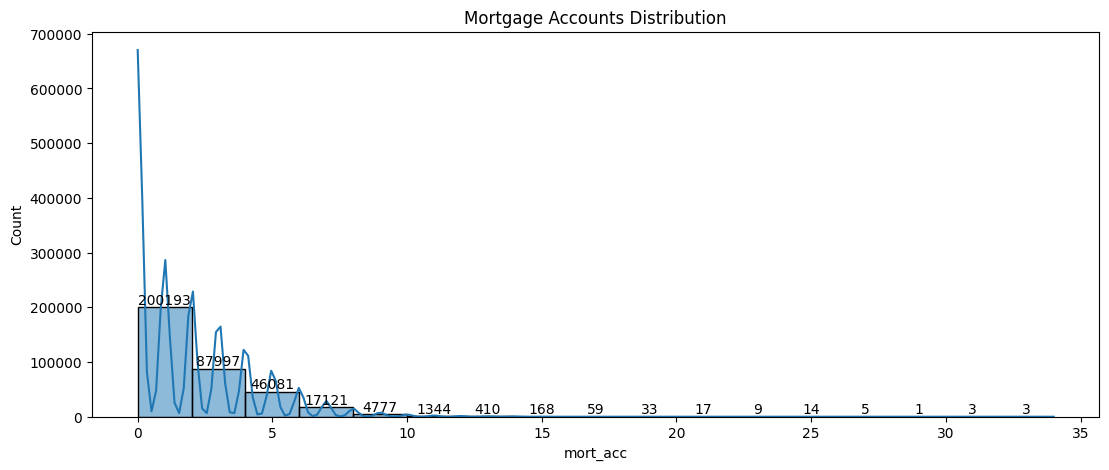

In [ ]:
#mort_acc
title = 'Mortgage Accounts Distribution'
hist_with_annotation(dataset, 'mort_acc', binwidth=2,  fs=(13,5), plot_title = title)

<font color='blue'>Observations:</font>
* The distribution is highly right-skewed, meaning that most individuals have a very small number of mortgage accounts.
* The majority of individuals have 0 mortgage accounts.
* There are a few individuals with a larger number of mortgage accounts, but the distribution is very sparse.

Overall, the chart shows that most individuals have a clean credit history with no mortgage accounts. However, there are a few individuals with a larger number of mortgage accounts, which could be a cause for concern.

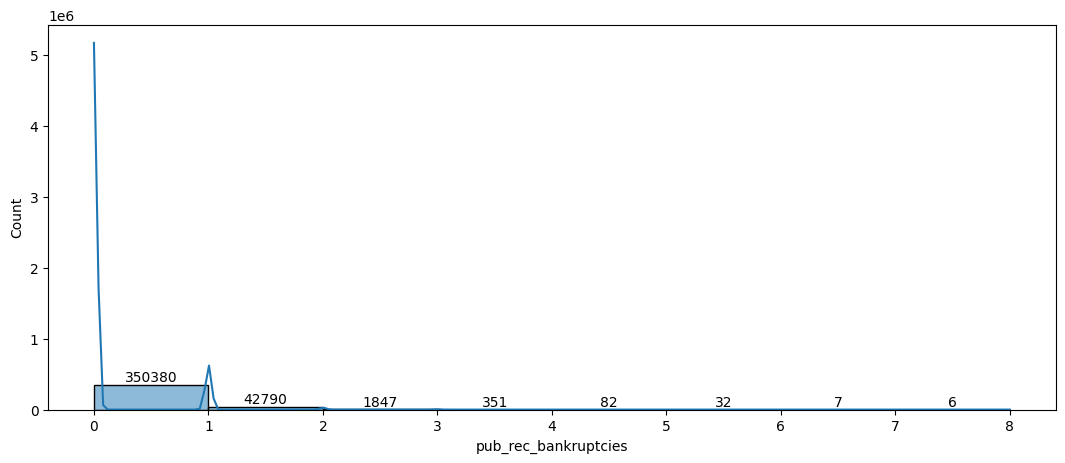

In [ ]:
#pub_rec_bankruptcies
hist_with_annotation(dataset, 'pub_rec_bankruptcies', binwidth=1,  fs=(13,5))

<font color='blue'>Observations:</font>
* The distribution is highly right-skewed, meaning that most individuals have a very small number of public record bankruptcies.
* The majority of individuals have 0 public record bankruptcies.
* There are a few individuals with a larger number of public record bankruptcies, but the distribution is very sparse.

Overall, the chart shows that most individuals have a clean credit history with no public record bankruptcies. However, there are a few individuals with a larger number of public record bankruptcies, which could be a cause for concern.

#<font color="#662f96"><span><b>Bivariate </b></span></font><font color="#943699" ><span><b>Analysis</b></span></font>

In [ ]:
def sns_annotation(ax):
  for _ in ax.patches:
    x= _.get_x()
    y = _.get_height()
    w = _.get_width()
    p = (x+w/2, y)
    ax.annotate(y, p, ha = 'center', va ='bottom')

term  loan_status   count
0   36 months   Fully Paid  254365
1   60 months   Fully Paid   63992
2   36 months  Charged Off   47640
3   60 months  Charged Off   30033

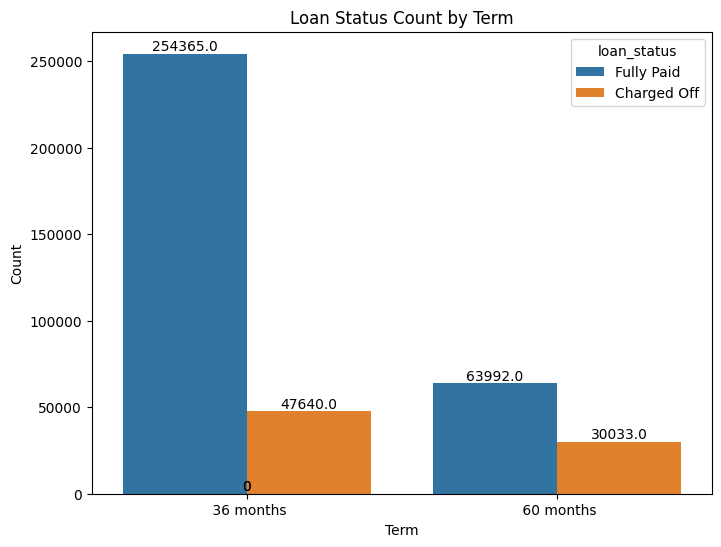

In [ ]:
df_loan_term_status = dataset[['term','loan_status']]
df_loan_term_status_count = df_loan_term_status.value_counts().reset_index()
display(df_loan_term_status_count)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='term', y='count', hue='loan_status', data=df_loan_term_status_count)
plt.title('Loan Status Count by Term')
plt.xlabel('Term')
plt.ylabel('Count')
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
* Most of the people took loans for 36 months term.
* loans with 60 months term are more riskier.

grade  count_by_group  loan_status  grp_loan_status_count     pecent
0      B          116018   Fully Paid                 101431  87.426951
1      C          105987   Fully Paid                  83538  78.819100
2      A           64187   Fully Paid                  60151  93.712122
3      D           63524   Fully Paid                  45186  71.132171
4      C          105987  Charged Off                  22449  21.180900
5      E           31488   Fully Paid                  19723  62.636560
6      D           63524  Charged Off                  18338  28.867829
7      B          116018  Charged Off                  14587  12.573049
8      E           31488  Charged Off                  11765  37.363440
9      F           11772   Fully Paid                   6735  57.212029
10     F           11772  Charged Off                   5037  42.787971
11     A           64187  Charged Off                   4036   6.287878
12     G            3054   Fully Paid                   1593  52.161100
13     G            3054  Charged Off                   1461  47.838900

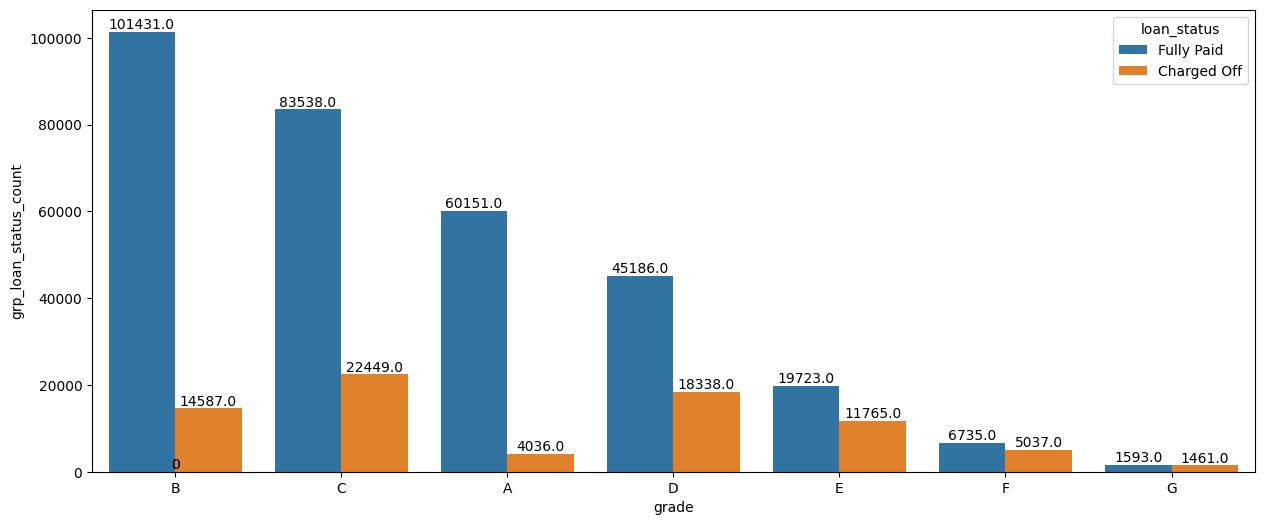

In [ ]:
df_grade_counts = dataset[['grade']].value_counts().reset_index()
df_grade_counts.rename({'count':'count_by_group'}, axis=1, inplace=True)
df_loan_grade_status = dataset[['grade','loan_status']].value_counts().reset_index()
df_loan_grade_status.rename({'count':'grp_loan_status_count'}, axis=1, inplace=True)
df_merged = pd.merge(df_grade_counts, df_loan_grade_status, on='grade', how='right')
df_merged['pecent'] = (df_merged['grp_loan_status_count']/ df_merged['count_by_group'])*100
display(df_merged)
np.round(df_merged,2)
plt.figure(figsize=(15,6))
ax =sns.barplot(x='grade', y='grp_loan_status_count', hue='loan_status', data=df_merged)
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
* Most of the people who took loans are with B and C grades.
* E, F, & G grade people are more riskier compared to other grades.

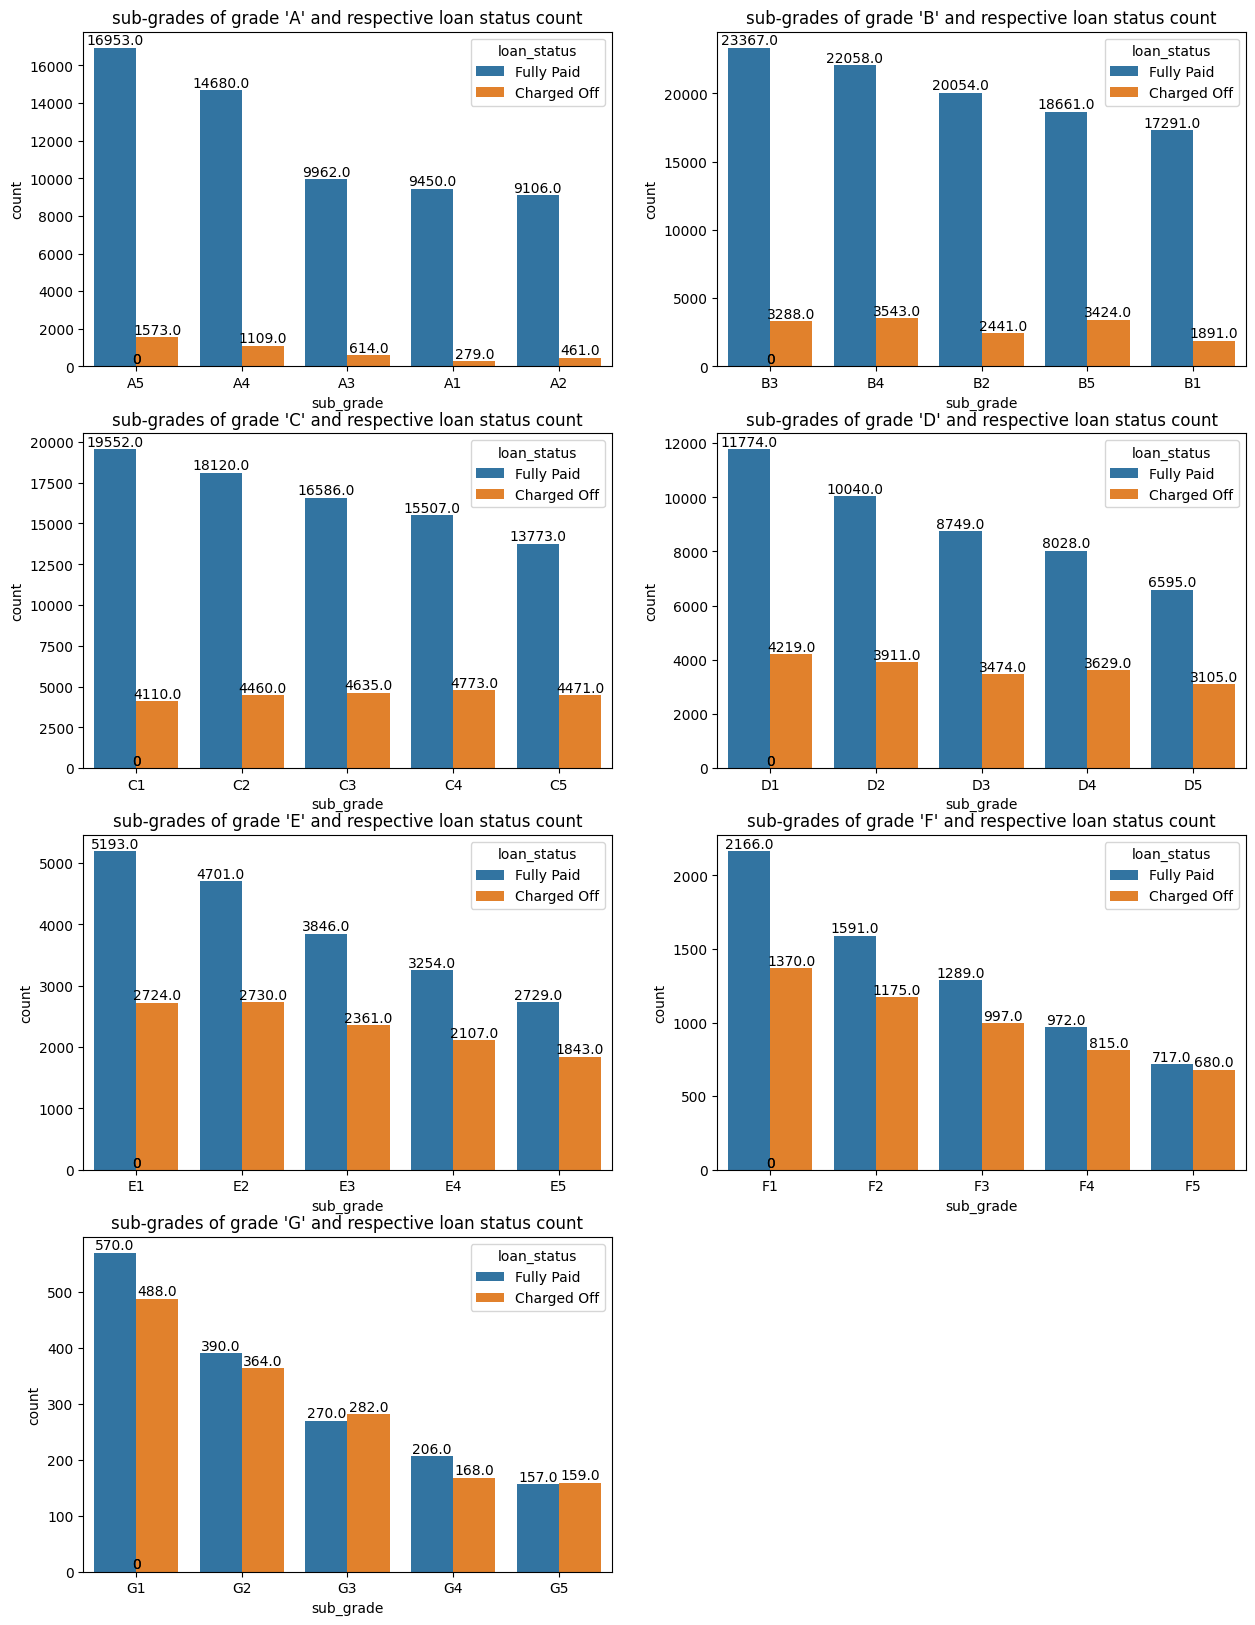

In [ ]:
df_sub_grd_loan_status_count = dataset[['sub_grade', 'loan_status']].value_counts().reset_index()
df_sub_grd_loan_status_count
grades = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='str').reshape(7,1)
values = np.array([1,2,3,4,5,6,7], dtype='str').reshape(1,7)
subGrades = np.char.add(grades, values)
plt.figure(figsize=(15,20))

for i in range(7):
  plt.subplot(4, 2, i+1)
  plt.title(f"sub-grades of grade '{grades.flatten()[i]}' and respective loan status count")
  ax =sns.barplot(x='sub_grade', y='count', hue='loan_status', \
      data=df_sub_grd_loan_status_count[np.isin(\
      df_sub_grd_loan_status_count.loc[:,'sub_grade'], subGrades[i])])
  sns_annotation(ax)
plt.show()

<font color='blue'>Observations:</font>

**Overall Trend:**

As the grade and sub-grade increase, the proportion of loans that are Charged Off generally increases. This suggests that loans with lower grades and sub-grades are more likely to default.

**Specific Grade Observations:**

* Grade A: Sub-grades A1 and A2 have the highest proportion of Fully Paid loans, indicating a lower risk of default.

* Grade B: Sub-grades B1 and B2 also have a high proportion of Fully Paid loans, but the proportion of Charged Off loans starts to increase compared to Grade A.


* Grade C: The proportion of Charged Off loans significantly increases across all sub-grades of C, indicating a higher risk of default.  
Grade D: The trend of increasing Charged Off loans continues in Grade D, with sub-grades D4 and D5 having the highest proportion of Charged Off loans.

Grade E, F, and G: The proportion of Charged Off loans is very high across all sub-grades of E, F, and G, indicating a very high risk of default.

**Additional Insights:**

* The number of loans decreases as the grade and sub-grade increase. This is likely because lower-grade loans are less likely to be approved.
* The charts provide a visual representation of the risk associated with different loan grades and sub-grades. This information can be useful for lenders in making credit decisions.

Overall, these charts provide valuable insights into the relationship between loan grade, sub-grade, and loan status. Lenders can use this information to assess the risk associated with different loans and make informed decisions.

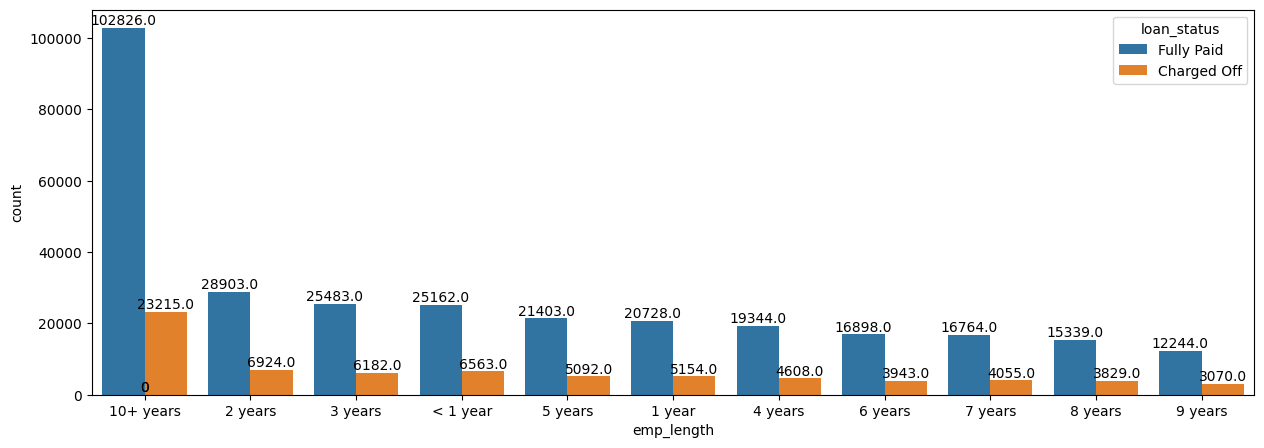

In [ ]:
plt.figure(figsize=(15,5))
emp_len_loan_status = dataset[['emp_length', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='emp_length', y='count', hue='loan_status', data=emp_len_loan_status)
sns_annotation(ax)
plt.show()

<font color='blue'>Observations:</font>

* Employees with 10+ years of experience have the highest number of loan applications.
* The number of loan applications generally decreases as the employee experience decreases.
* Employees with less than 1 year of experience have the second-highest number of loan applications.
* Employees with 4 years of experience have the third-highest number of loan applications.
* The number of loan applications for employees with 6, 9, 2, 3, 8, 7, and 5 years of experience are relatively similar.

Overall, the chart suggests that employees with more experience tend to apply for fewer loans, while those with less experience apply for more loans.

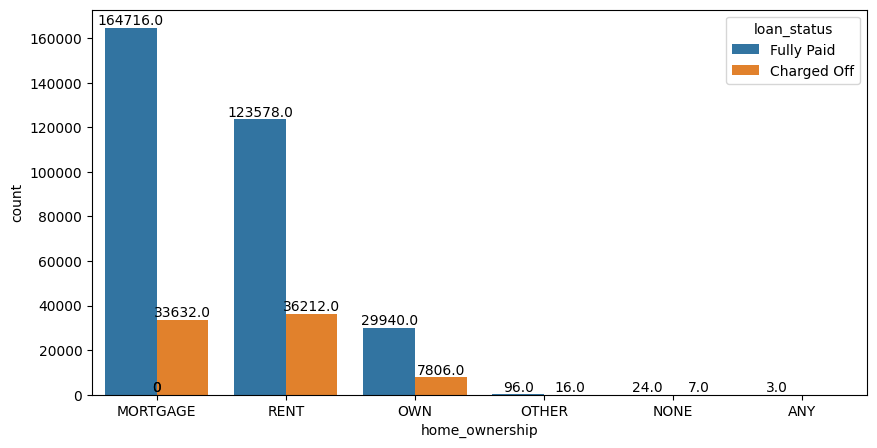

In [ ]:
plt.figure(figsize=(10,5))
home_os_loan_status = dataset[['home_ownership', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='home_ownership', y='count', hue='loan_status', data=home_os_loan_status)
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
* High risk in giving loans to people who are staying for rent.
* Most of the people who took loans are either mortgaged their house or stayed in rented house.

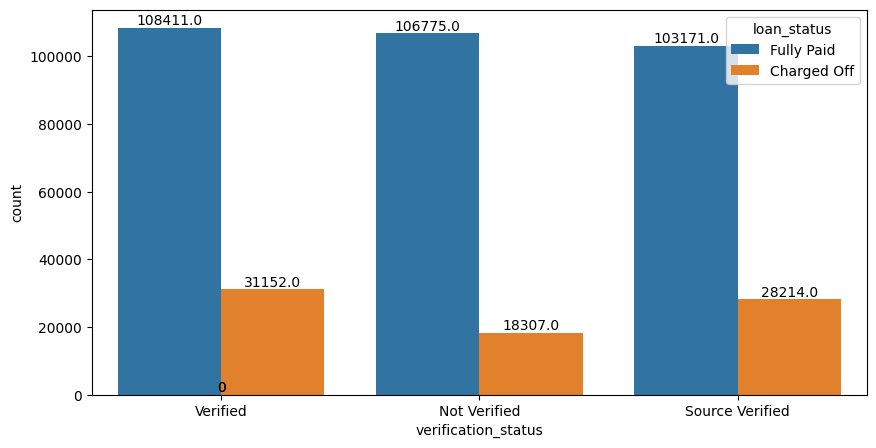

In [ ]:
# verification_status
plt.figure(figsize=(10,5))
vs_loan_status = dataset[['verification_status', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='verification_status', y='count', hue='loan_status', data=vs_loan_status)
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
* High risk in verified and source verified compared to Not Verified.

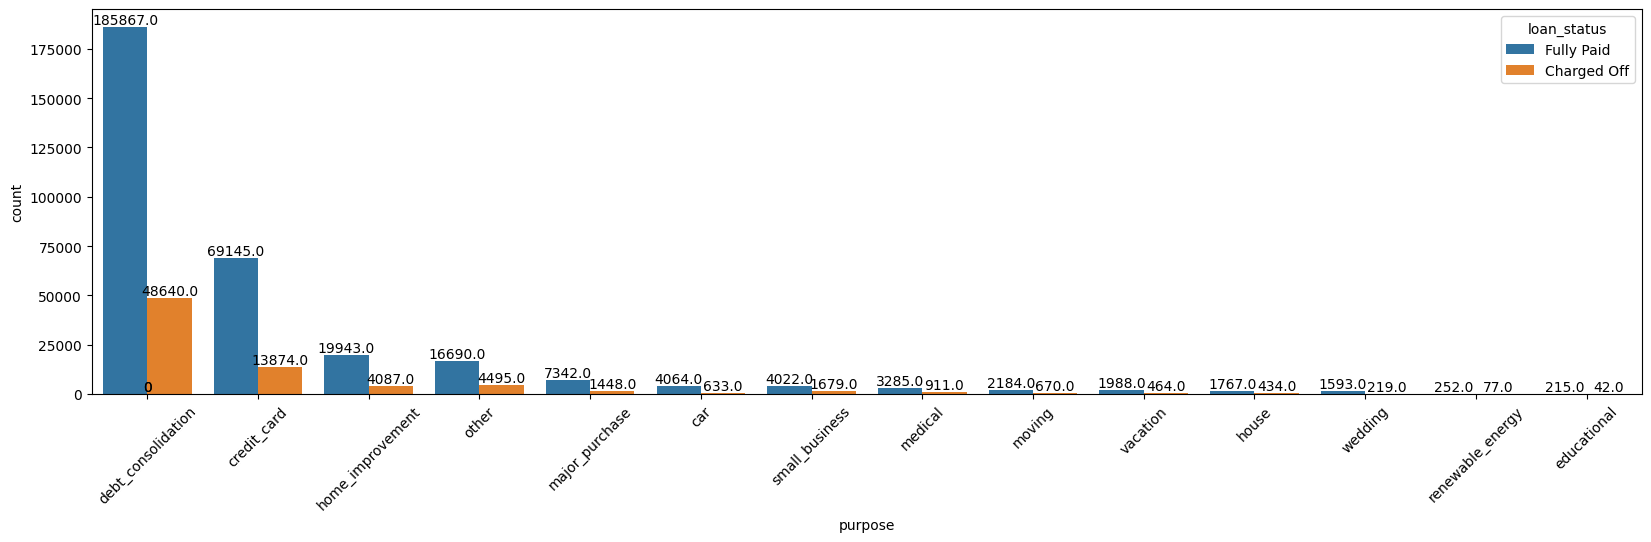

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
purpose_loan_status = dataset[['purpose', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='purpose', y='count', hue='loan_status', data=purpose_loan_status)
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
*  Most of the loans were applied for debt_consolidation and credit card.
* Very high risk in giving loans for small_business.

<ipython-input-44-e5bd3b2a8fd5>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fractional Loan', 'Whole Loan'])


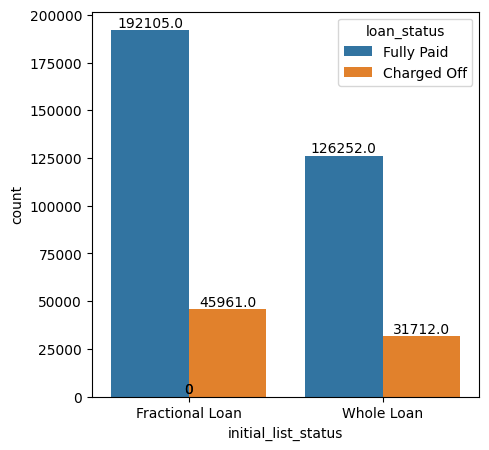

In [ ]:
plt.figure(figsize=(5,5))
init_lst_loan_status = dataset[['initial_list_status', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='initial_list_status', y='count', hue='loan_status', data=init_lst_loan_status)
sns_annotation(ax)
ax.set_xticklabels(['Fractional Loan', 'Whole Loan'])
plt.show()

<font color='blue'>Observation:</font>
*  Most of the loans are Fractional.
* Very high risk in Whole Loan.

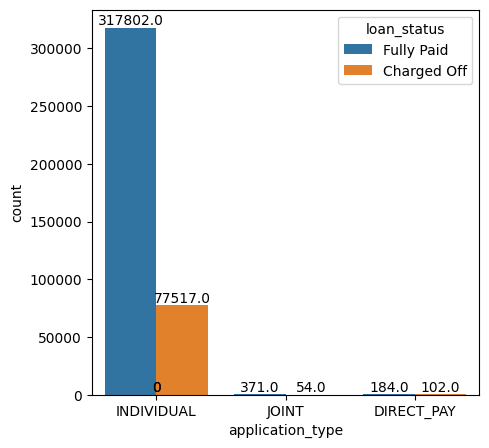

In [ ]:
#application_type
plt.figure(figsize=(5,5))
appply_loan_status = dataset[['application_type', 'loan_status']].value_counts().reset_index()
ax = sns.barplot(x='application_type', y='count', hue='loan_status', data=appply_loan_status)
sns_annotation(ax)
plt.show()

<font color='blue'>Observation:</font>
*  Most of the loans are "INDIVIDUAL".
* Very high risk in "DIRECT_PAY".

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<font color='blue'>Observation:</font>
*  "issue_d" and "earliest_cr_line" are not in the date time format need to handle this further.

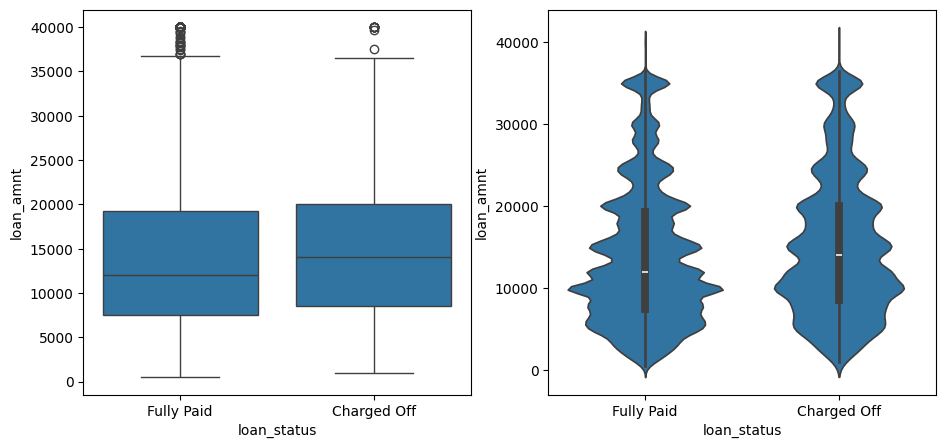

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='loan_amnt', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='loan_amnt', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   There is very high variation in the distribution of "Fully Paid" and "Charged off". The people who charged off need to pay higher interest rates.
*    There is more skew and outliers are detected which need to be handled further.

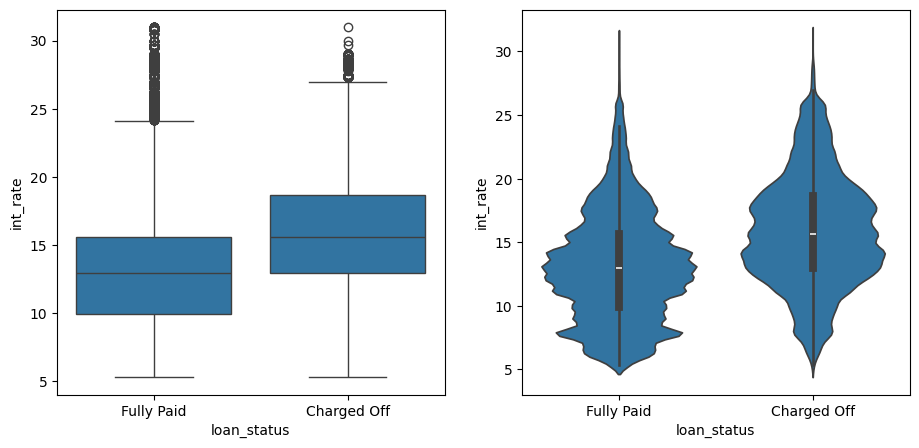

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='int_rate', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='int_rate', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   There is very high variation in the distribution of "Fully Paid" and "Charged off". The people who charged off need to pay higher interest rates.
*    There is more skew and outliers are detected which need to be handled further.

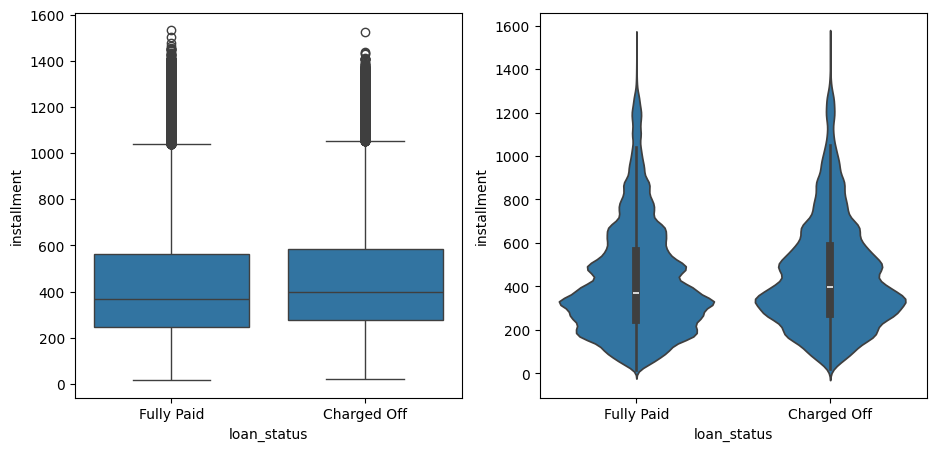

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='installment', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='installment', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   There is significant difference between the "Full Paid" and "Charged Off". The mean value is more for the "Charged Off" that means more defaulters has taken more installments.
*    There is more skew in data and outliers are detected which need to be handled further.

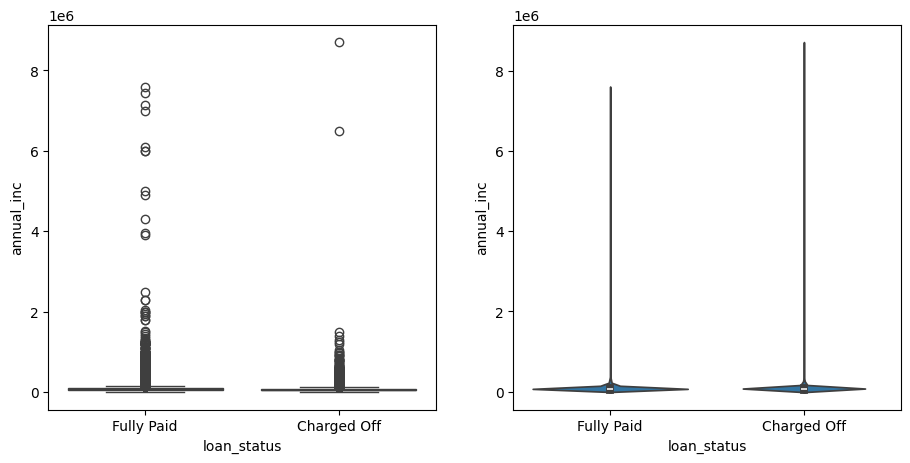

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='annual_inc', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='annual_inc', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   Doesn't seem to be a noticeable difference in annual_inc between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*    There is more skew in data and outliers are detected which need to be handled further. More extreme values for charged off.

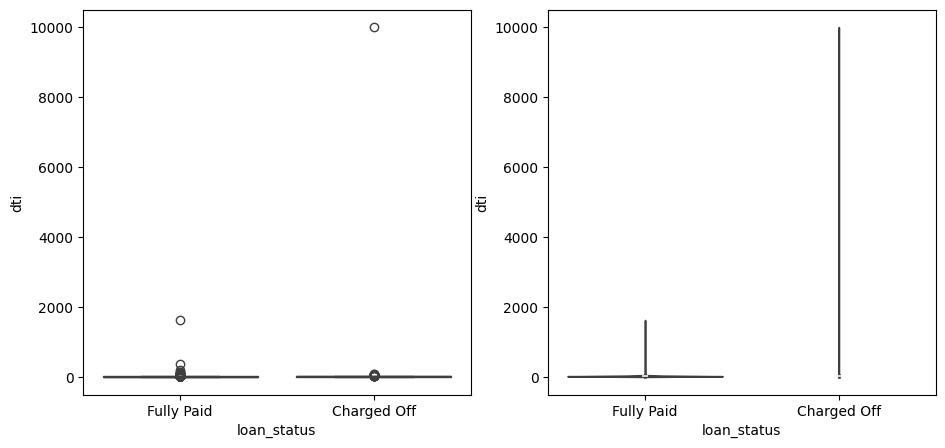

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='dti', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='dti', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   Doesn't seem to be a noticeable difference in total_acc between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*    There is more skew and outliers are detected which need to be handled further. More extreme values for charged off.

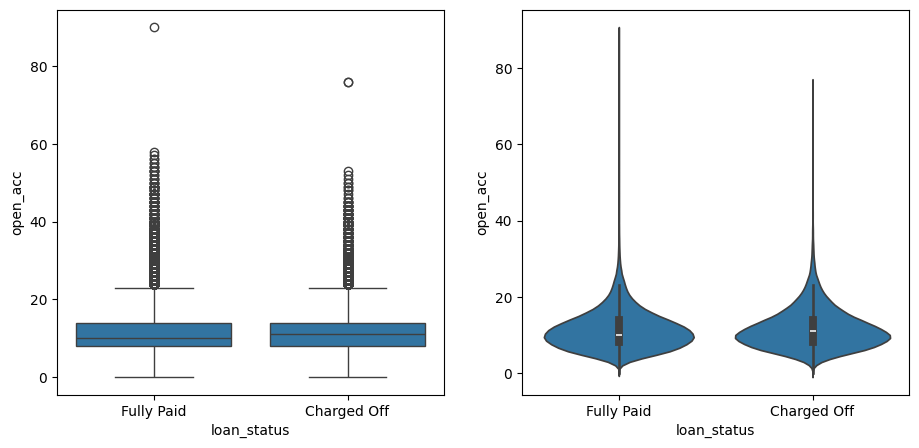

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='open_acc', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='open_acc', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   There is a slight difference in the spread of open_acc values between "Fully Paid" and "Charged Off," with "Fully Paid" showing a distribution of mean value is bit lower for "Fully Paid" compared to "Charged Off"
*    There is more skew in data and outliers are detected which need to be handled further.

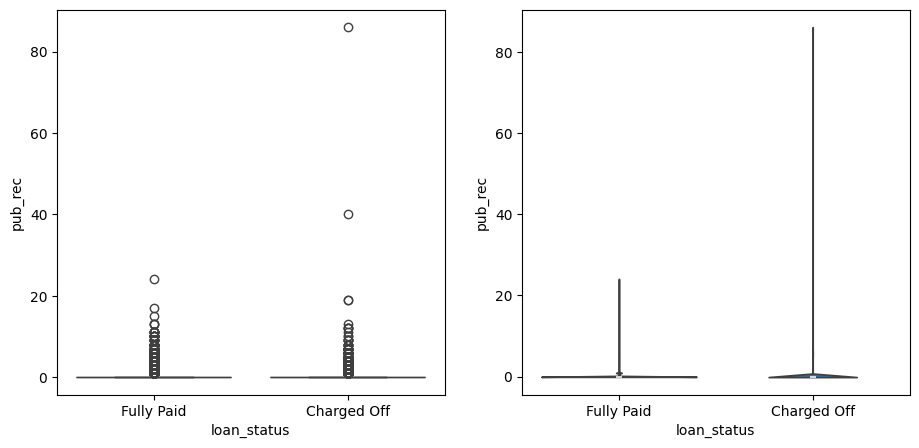

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='pub_rec', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='pub_rec', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   Doesn't seem to be a noticeable difference in total_acc between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*    There is more skew in data and outliers are detected which need to be handled further. More extreme values for charged off.

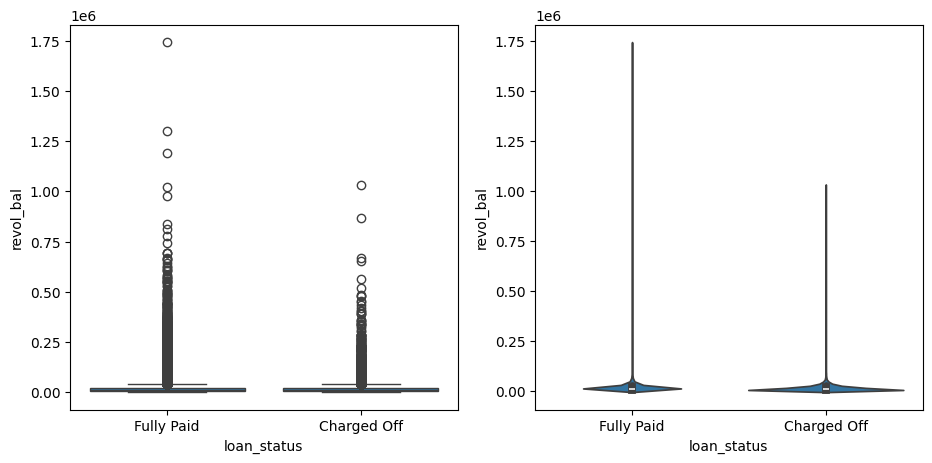

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='revol_bal', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='revol_bal', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*   Doesn't seem to be a noticeable difference in total_acc between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*    There is more skew in data and outliers are detected which need to be handled further.

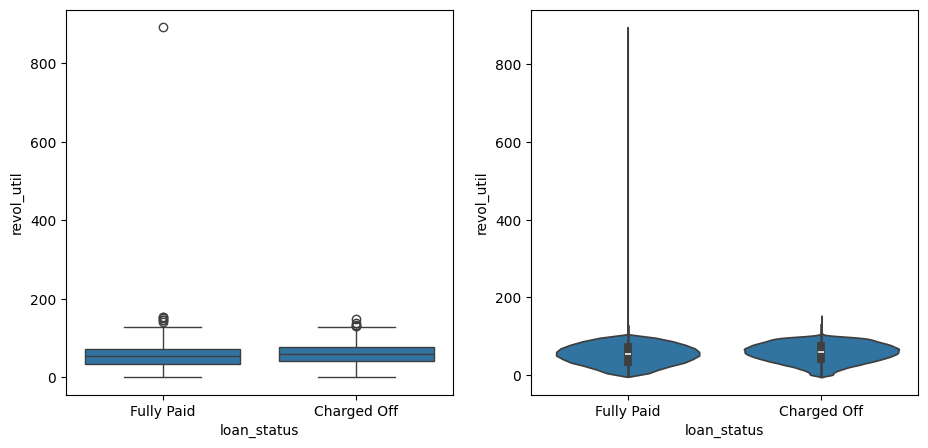

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='revol_util', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='revol_util', data=dataset)
plt.show()

<font color='blue'>Observation:</font>
*  There is a slight difference in the spread of revol_util values between "Fully Paid" and "Charged Off," with "Fully Paid" showing a wider distribution at higher values, the overall pattern is quite similar. This may indicate limited impact of revol_util on distinguishing between the two loan statuses.
*    There is more skew in data and outliers are detected which need to be handled further.

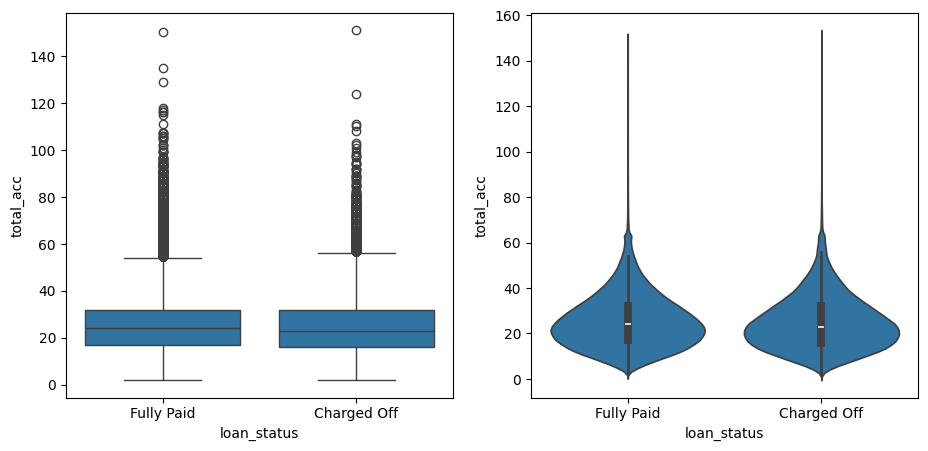

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='total_acc', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='total_acc', data=dataset)
plt.show()

<font color='blue'>Observation:</font>

*   Doesn't seem to be a noticeable difference in total_acc between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*   There is more skew in data and outliers are detected which need to be handled further.

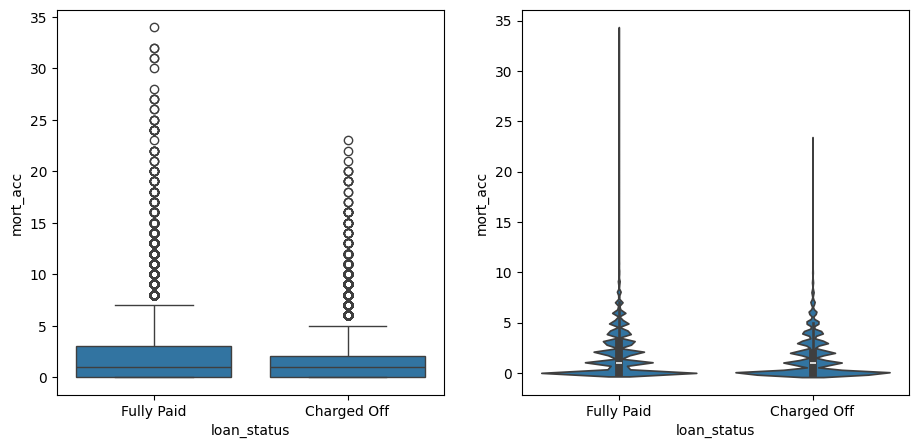

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='mort_acc', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='mort_acc', data=dataset)
plt.show()


<font color='blue'>Observation:</font>

*   There is a slight difference in the spread of mort_acc values between "Fully Paid" and "Charged Off," with "Fully Paid" showing a wider distribution at higher values, the overall pattern is quite similar. This may indicate limited impact of mort_acc on distinguishing between the two loan statuses.
*    There is more skew in data and outliers are detected which need to be handled further.

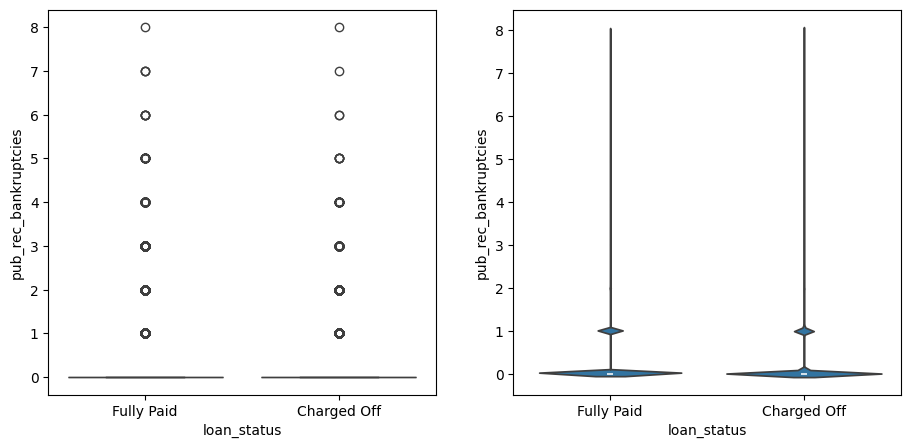

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='pub_rec_bankruptcies', data=dataset)
plt.show()

<font color='blue'>Observation:</font>

*   Doesn't seem to be a noticeable difference in pub_rec_bankruptcies between "Fully Paid" and "Charged Off," which might imply limited predictive power of this feature for distinguishing loan status.
*   There is more skew in data and outliers are detected which need to be handled further.



#<font color="#662f96"><span><b>Multivaria</b></span></font><font color="#943699" ><span><b>te Analysis</b></span></font>

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1280: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 3000x3000 with 0 Axes>

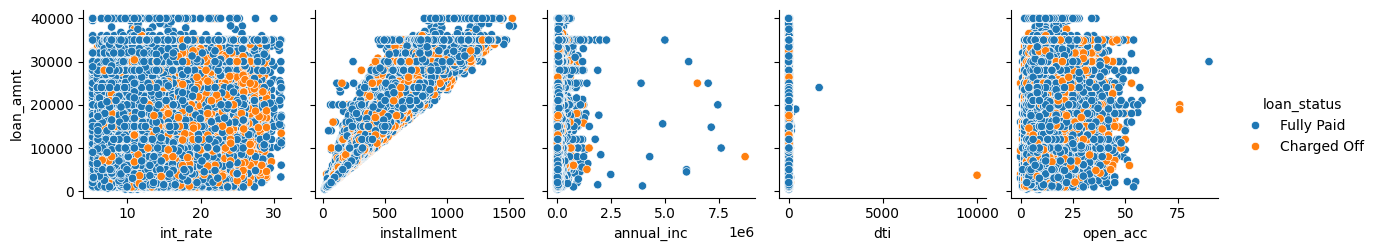

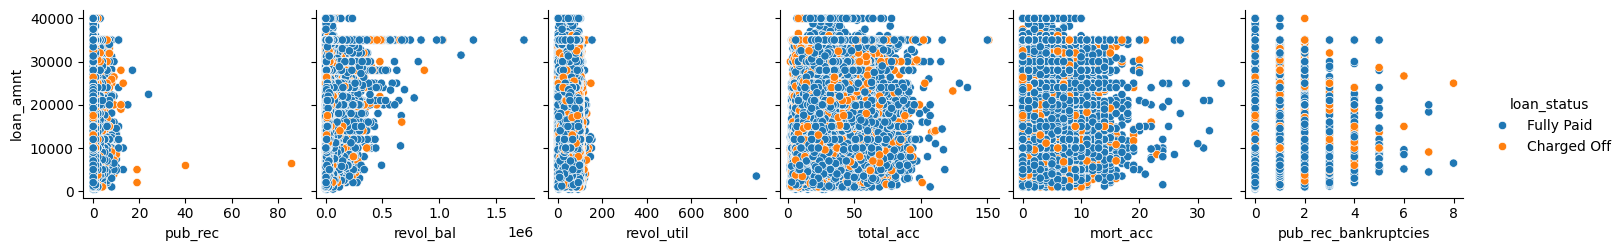

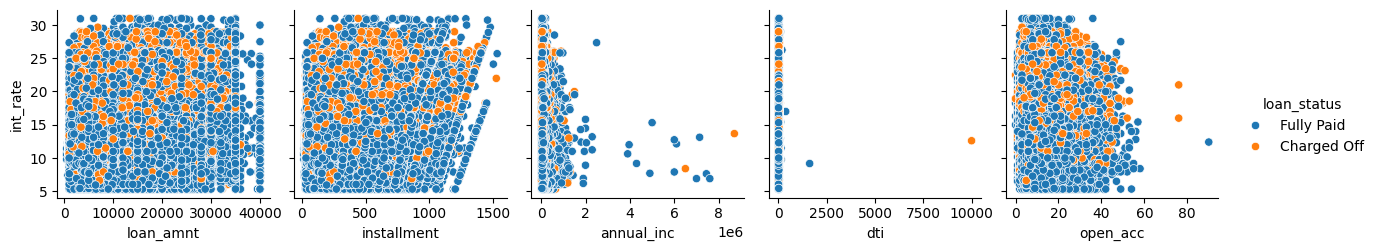

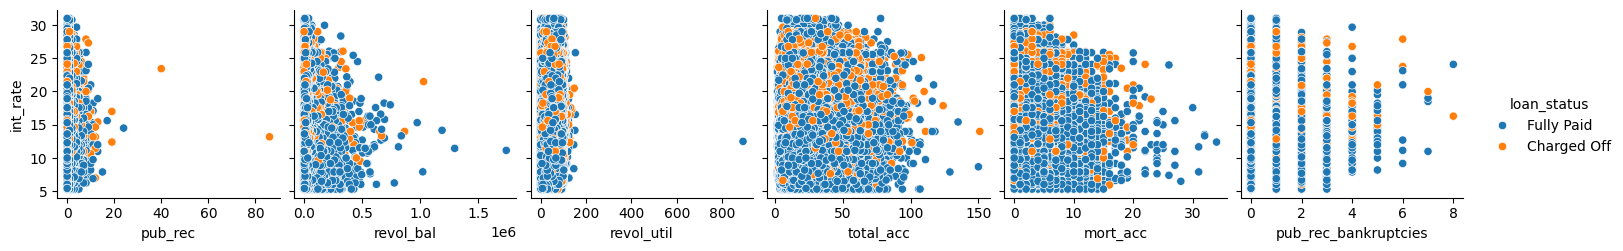

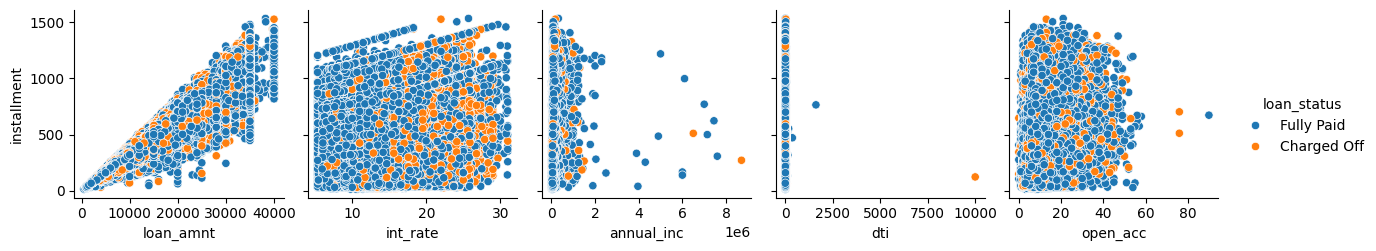

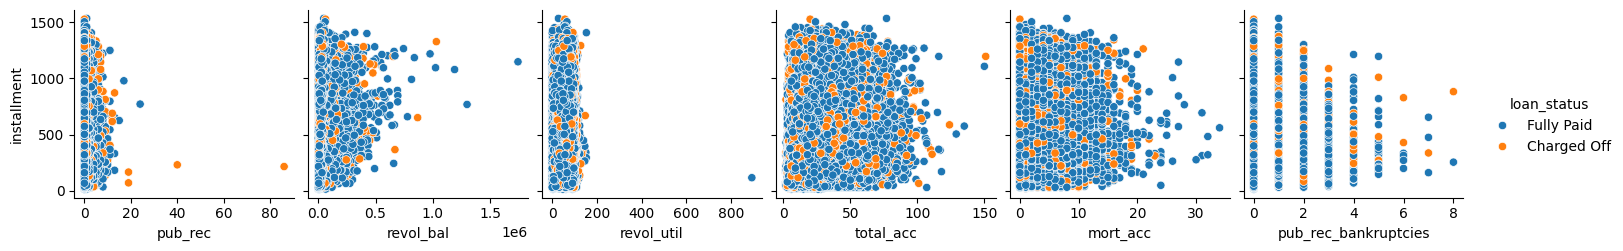

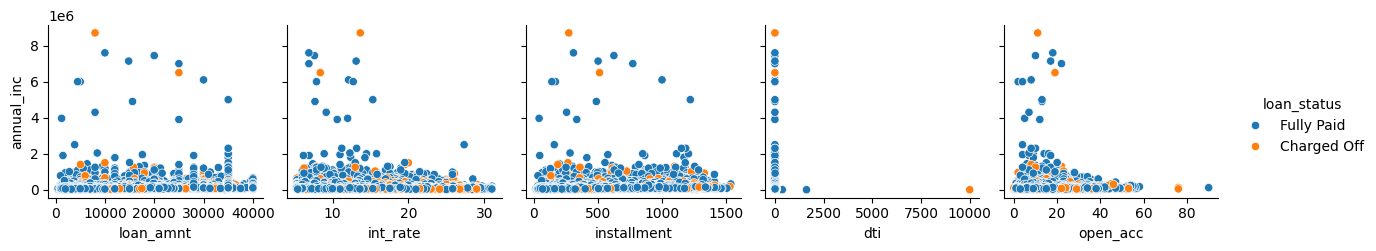

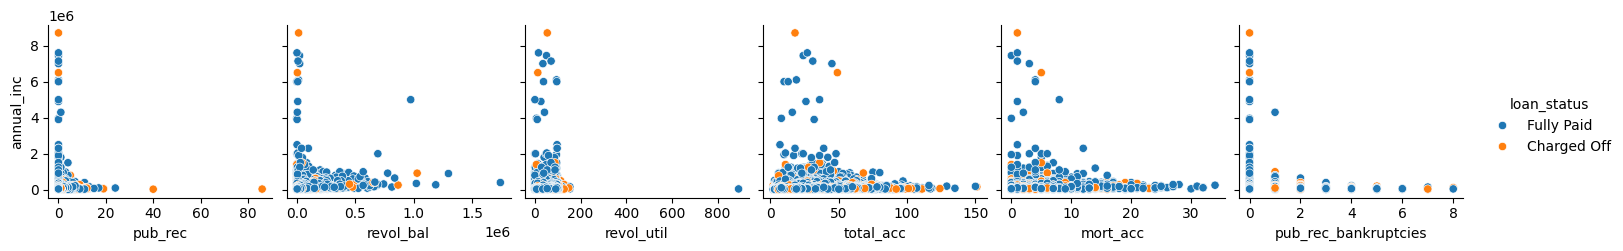

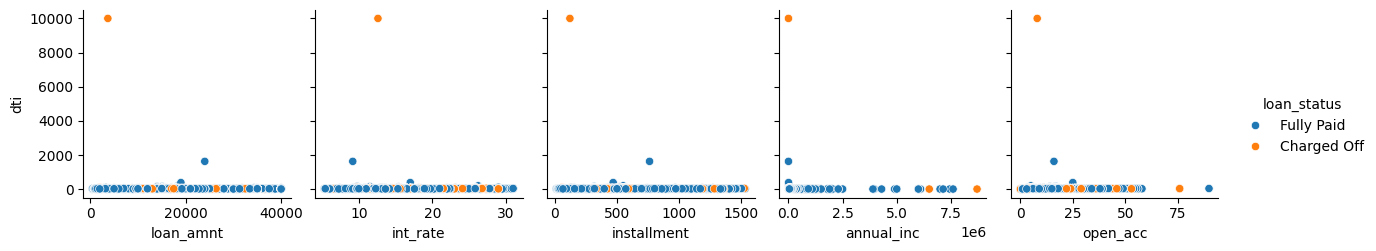

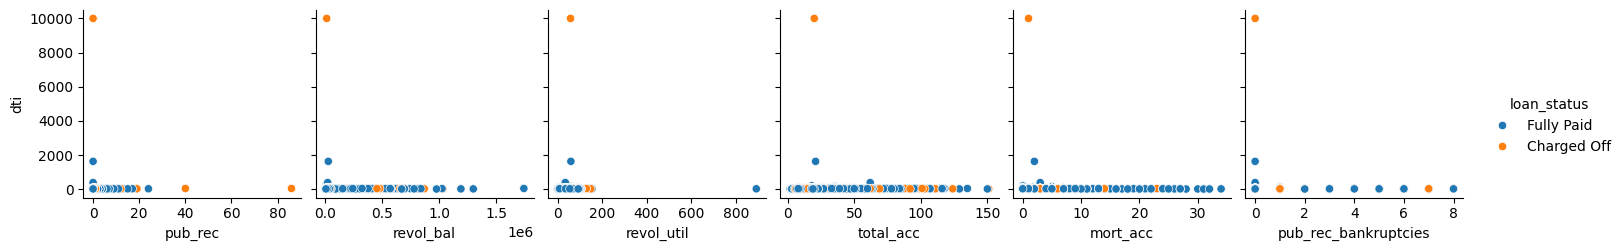

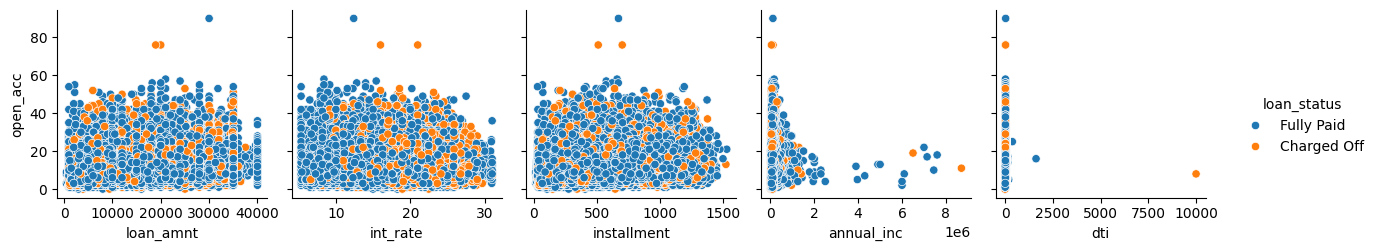

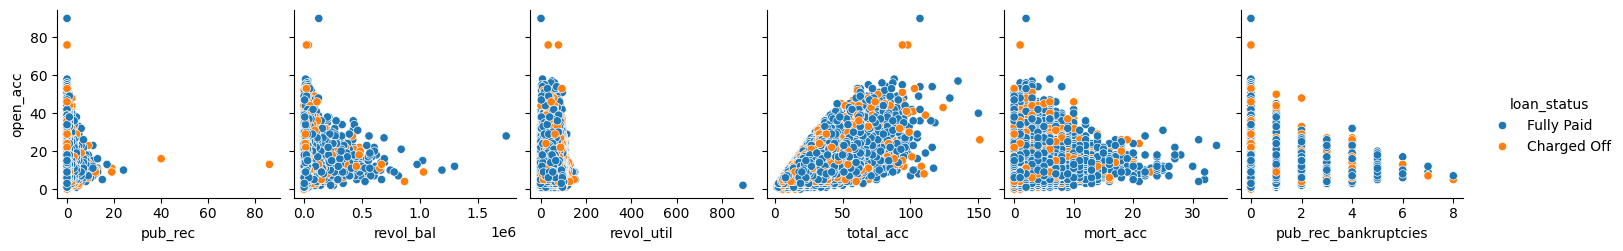

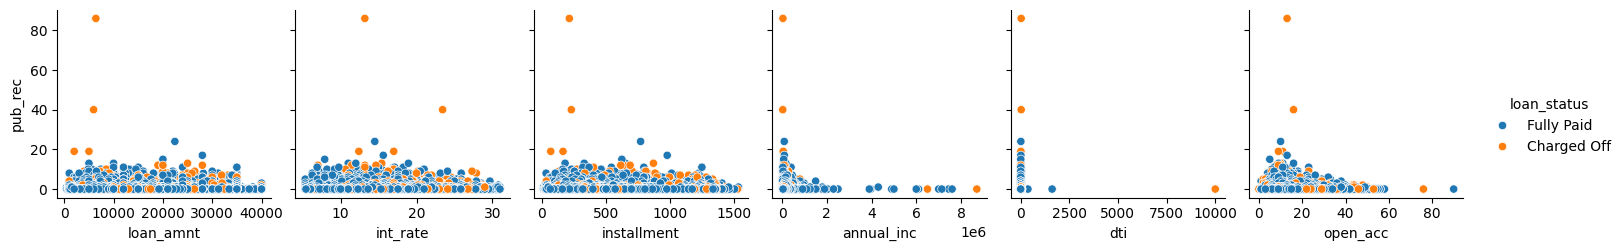

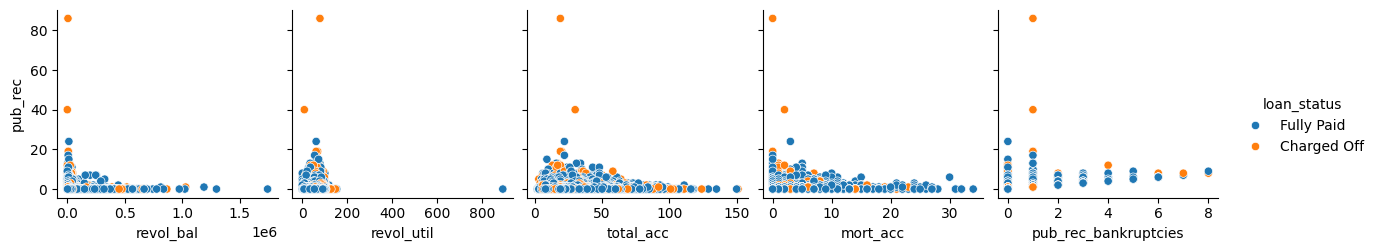

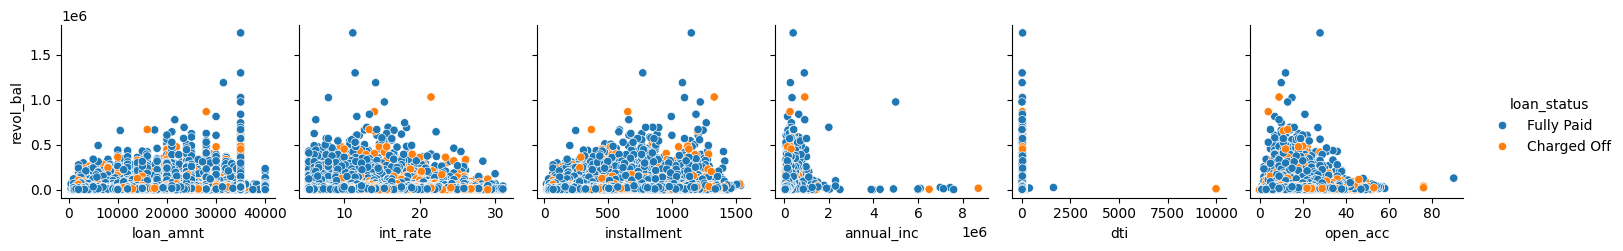

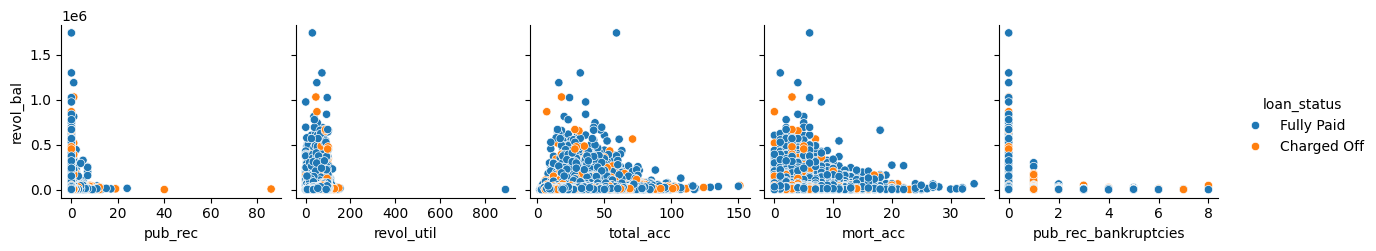

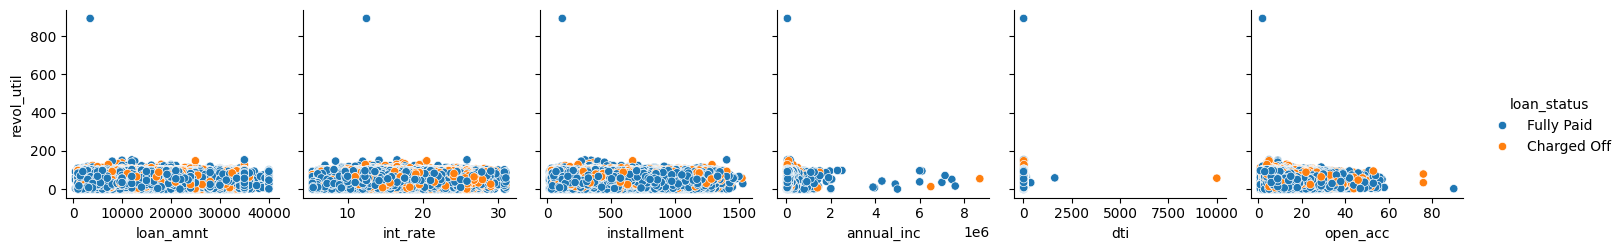

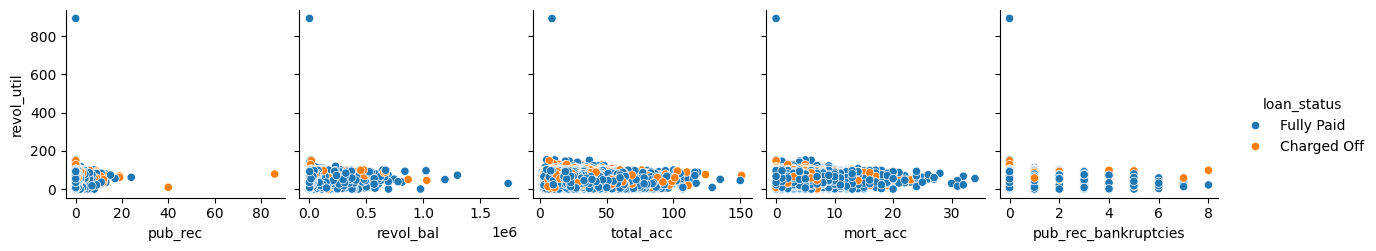

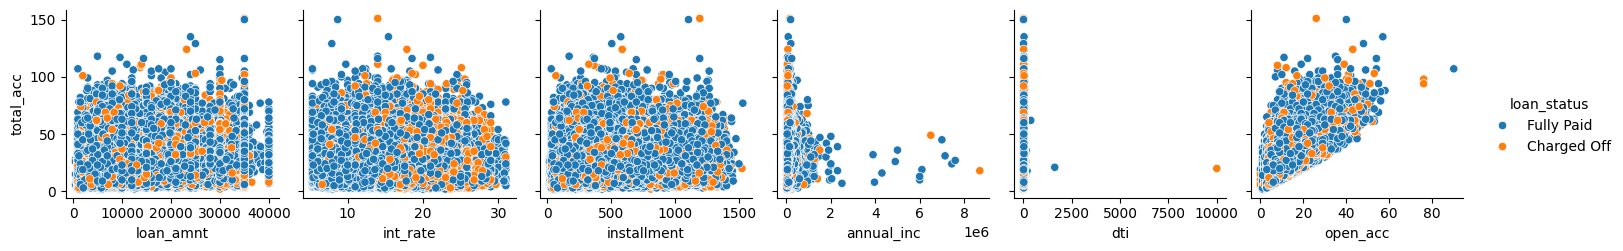

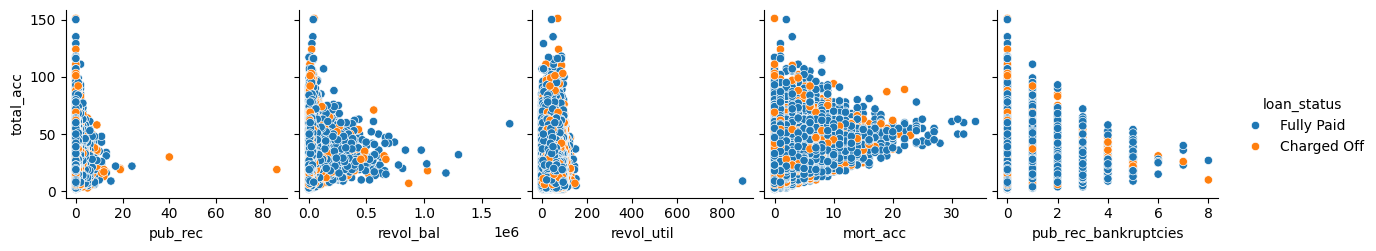

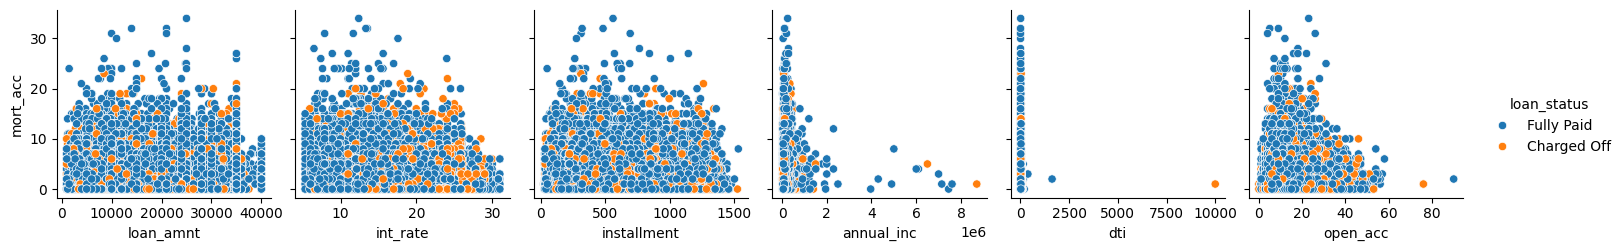

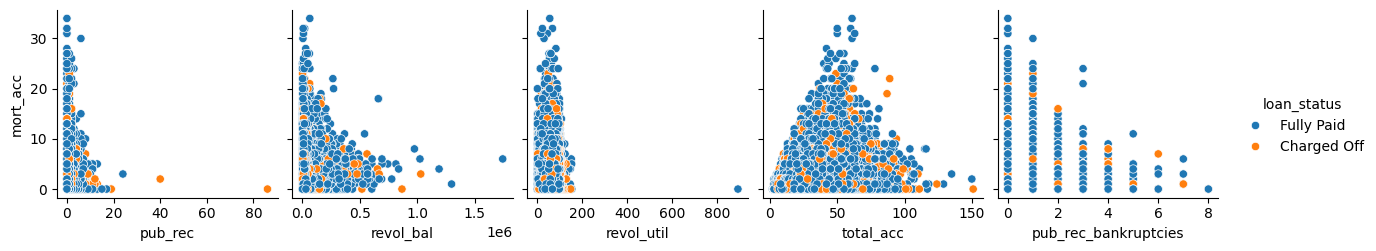

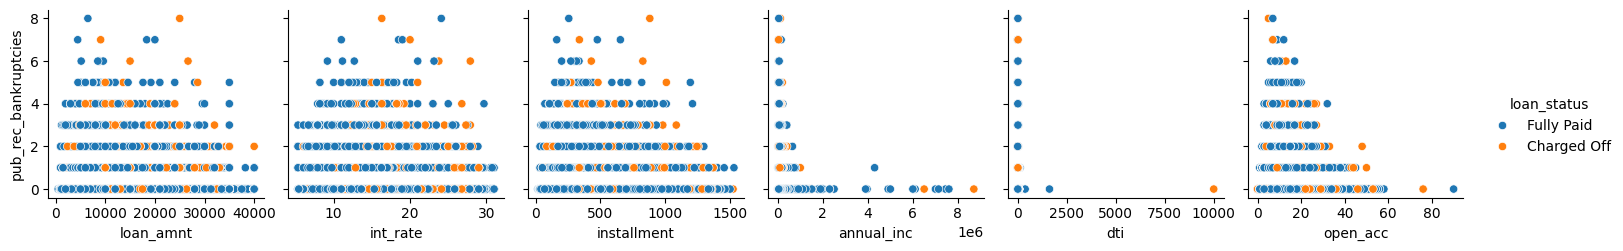

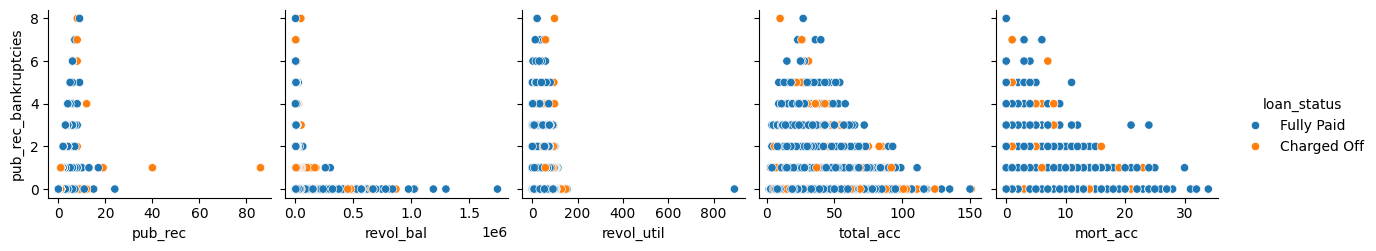

In [ ]:
# loan_amnt	int_rate	installment	annual_inc	dti	open_acc	pub_rec	revol_bal	revol_util	total_acc	mort_acc	pub_rec_bankruptcies
plt.figure(figsize=(30,30))
num_features= np.array(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'])
num_features_set1 = np.array(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc'])
num_features_set2 = np.array(['pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'])
for i in range(0,len(num_features)):
  if np.isin(num_features[i], num_features_set1):
    yvar = num_features_set1
    xvars1 = np.delete(num_features_set1,i)
    xvars2 = num_features_set2
  else:
    yvar = num_features_set2
    xvars1 = num_features_set1
    xvars2=np.delete(num_features_set2,i-6)
  sns.pairplot(y_vars=num_features[i], x_vars=xvars1,data=dataset, hue='loan_status')
  sns.pairplot(y_vars=num_features[i], x_vars=xvars2,data=dataset, hue='loan_status')
plt.show()

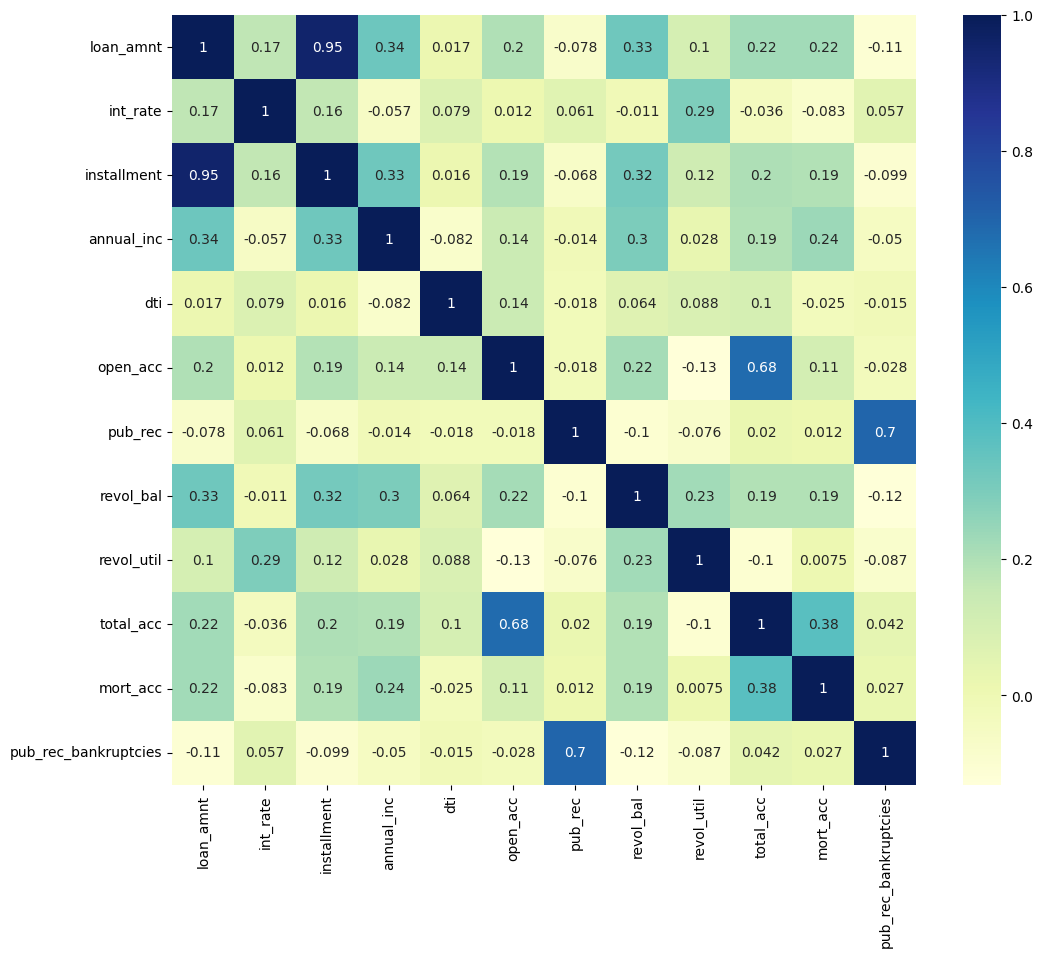

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=dataset[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']].corr(), annot=True, cmap='YlGnBu')
plt.show()

#<font color="#662f96"><span><b>Data Pre-</b></span></font><font color="#943699" ><span><b>Processing</b></span></font>

##<font color="#1b6344"><span><b>Removing Highly Correlated Features</b></span>
*   Drop the features which are redundant.

In [ ]:
dataset.drop(columns='installment', inplace=True)
dataset.head()

loan_amnt        term  int_rate grade sub_grade                emp_title  \
0    10000.0   36 months     11.44     B        B4                Marketing   
1     8000.0   36 months     11.99     B        B5          Credit analyst    
2    15600.0   36 months     10.49     B        B3             Statistician   
3     7200.0   36 months      6.49     A        A2          Client Advocate   
4    24375.0   60 months     17.27     C        C5  Destiny Management Inc.   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0  10+ years           RENT    117000.0        Not Verified  Jan-2015   
1    4 years       MORTGAGE     65000.0        Not Verified  Jan-2015   
2   < 1 year           RENT     43057.0     Source Verified  Jan-2015   
3    6 years           RENT     54000.0        Not Verified  Nov-2014   
4    9 years       MORTGAGE     55000.0            Verified  Apr-2013   

   loan_status             purpose                    title    dti  \
0   Fully Paid            vacation                 Vacation  26.24   
1   Fully Paid  debt_consolidation       Debt consolidation  22.05   
2   Fully Paid         credit_card  Credit card refinancing  12.79   
3   Fully Paid         credit_card  Credit card refinancing   2.60   
4  Charged Off         credit_card    Credit Card Refinance  33.95   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3         Sep-2006       6.0      0.0     5472.0        21.5       13.0   
4         Mar-1999      13.0      0.0    24584.0        69.8       43.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   
3                   f       INDIVIDUAL       0.0                   0.0   
4                   f       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

##<font color="#1b6344"><span><b>Null Values Treatment</b></span>
*   Drop Rows/Columns
*   Impute Values

In [ ]:
df_null_columns = df_null_values[df_null_values['percentage'] != 0]
df_null_columns.set_index('column_name', inplace=True)
df_null_columns.sort_values(by='percentage', ascending=False)

percentage
column_name                     
mort_acc                    9.54
emp_title                   5.79
emp_length                  4.62
title                       0.44
pub_rec_bankruptcies        0.14
revol_util                  0.07

In [ ]:
null_cols_names = df_null_columns.index
round(len(dataset[dataset[null_cols_names].isna().any(axis=1)])/len(dataset)*100,2)


15.19

<font color='blue'>Observation:</font>   
**15.19%** of the rows have NaN values for atleast one feature


In [ ]:
df_null = dataset[dataset[null_cols_names].isna().any(axis=1)]
df_null.head(10)

loan_amnt        term  int_rate grade sub_grade  \
22     4200.0   36 months      6.99     A        A3   
25     6000.0   36 months     11.36     B        B5   
32     3000.0   36 months      6.03     A        A1   
35     5375.0   36 months     13.11     B        B4   
36     3250.0   36 months     16.78     C        C5   
40    35000.0   60 months     16.99     D        D1   
41    28000.0   60 months     19.91     E        E4   
49    15000.0   36 months      7.89     A        A5   
58    10000.0   36 months     17.56     D        D1   
62     5000.0   36 months     10.39     B        B4   

                     emp_title emp_length home_ownership  annual_inc  \
22          midstate steel llc    5 years            OWN     24000.0   
25            CSU Monterey Bay    2 years           RENT     46680.0   
32  American Heart Association     1 year            OWN     64000.0   
35                         NaN        NaN           RENT     34000.0   
36                         NaN        NaN           RENT     22500.0   
40                         NaN    4 years       MORTGAGE    130000.0   
41           American Airlines  10+ years           RENT     52000.0   
49                         NaN        NaN       MORTGAGE     90000.0   
58                         NaN        NaN       MORTGAGE     32000.0   
62                        self  10+ years           RENT     66000.0   

   verification_status   issue_d  loan_status             purpose  \
22        Not Verified  Jun-2011   Fully Paid               other   
25        Not Verified  Apr-2010  Charged Off             medical   
32     Source Verified  Oct-2011   Fully Paid         credit_card   
35            Verified  May-2013   Fully Paid         credit_card   
36            Verified  Aug-2013  Charged Off  debt_consolidation   
40            Verified  Feb-2014   Fully Paid  debt_consolidation   
41            Verified  Dec-2011  Charged Off  debt_consolidation   
49            Verified  Apr-2016   Fully Paid  debt_consolidation   
58            Verified  Jul-2013   Fully Paid  debt_consolidation   
62        Not Verified  May-2008   Fully Paid             medical   

                                           title    dti earliest_cr_line  \
22                               kawasaki jetski   4.80         Oct-2006   
25  Medical and Post Graduate Education Expenses   6.56         Oct-2003   
32                              Consolidate debt   3.81         Apr-2002   
35                           Pay Off Credit Card  26.12         Apr-1998   
36                                         Cover  18.76         Jun-2009   
40                            Debt consolidation  14.03         Aug-1992   
41                            Debt Consalidation  20.70         Dec-1988   
49                            Debt consolidation  11.75         Aug-1994   
58                            debt consolidation   9.83         Sep-2006   
62                                   Dental Work   1.56         Dec-2001   

    open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
22       6.0      0.0        0.0         0.0        7.0                   f   
25       9.0      0.0     4370.0        40.1       10.0                   f   
32       6.0      0.0     4912.0        13.4       18.0                   f   
35       9.0      1.0    14998.0        88.7       20.0                   f   
36       7.0      0.0     7587.0        54.6        7.0                   f   
40      10.0      0.0    34130.0        53.8       27.0                   f   
41      10.0      0.0    29178.0        87.6       16.0                   f   
49       7.0      0.0     8205.0        93.2       18.0                   w   
58       6.0      0.0    11615.0        82.4        7.0                   w   
62      12.0      0.0    15807.0        20.0       17.0                   f   

   application_type  mort_acc  pub_rec_bankruptcies  \
22       INDIVIDUAL       NaN                   0.0   
25       INDIVIDUAL       Na

<font color='blue'>Observation:</font>   
From the above displayed rows we can observe that for most of the rows which has 'emp_title' as NaN has their respective 'emp_length' is also NaN, which indicates it comes under the category of **MNAR(Missing Not At random)**

In [ ]:
emp_title_length=df_null[df_null[['emp_title', 'emp_length']].isna().all(axis=1)]
lenght_both_title_length = len(emp_title_length)
print(Fore.BLUE,"The count of rows which has NaN for both  'emp_title' and 'emp_lengh' is ", Fore.BLACK,lenght_both_title_length)
percent = round(lenght_both_title_length/len(df_null)*100,2)
print(Fore.BLUE,"The percent of rows which has NaN for both  'emp_title' and 'emp_lengh' is ", Fore.BLACK,percent)

 The count of rows which has NaN for both  'emp_title' and 'emp_lengh' is   18123
 The percent of rows which has NaN for both  'emp_title' and 'emp_lengh' is   30.12


<font color='blue'>Observation:</font>   
**30.12%** of the rows from NaN values are the combination of both 'emp_title' and 'emp_lengh'



In [ ]:
print(dataset.shape)
dataset['emp_title'] = dataset['emp_title'].fillna('UnKnown Title')
dataset['emp_length'] = dataset['emp_length'].fillna('UnKnown Length')
# Since title, pub_rec_bankruptcies	, revol_util columns has very few null values dropping those rows
dataset = dataset.dropna(subset=['title', 'pub_rec_bankruptcies'	, 'revol_util'])
print(dataset.shape)

(396030, 26)
(393464, 26)


In [ ]:
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(dataset[['mort_acc']])
dataset.loc[:,['mort_acc']] = imputed_data.astype('int')

##<font color="#1b6344"><span><b>Duplicates Data Handling</b></span>
*   Find Duplicate Records
*   Remove Duplicates  

<font color='blue'>Observation:</font> From above Basic analysis on the data, No duplicate records found.


##<font color="#1b6344"><span><b>Transforming Features</b></span>
*  Log/Exponential Transform
*  Polynomial Features
*  Binning

> Columns <font color='magenta'>'annual_inc', 'dti', 'pub_rec', 'revol_bal', 'pub_rec_bankruptcies'</font> has more extreme values, These features can be handled using log-normal transformation technique.






In [ ]:
more_extreme_values_features = ['annual_inc', 'dti', 'pub_rec', 'revol_bal', 'pub_rec_bankruptcies']
for i in more_extreme_values_features:
  dataset.loc[:,i] = np.log1p(dataset.loc[:,i])

##<font color="#1b6344"><span><b>Outliers Treatment</b></span>
*   Detect Outliers
*   Handle Outliers

>From the above uni-variate and bi-variate analysis we can observe that all the numerical features has soo many outliers.




In [ ]:
def treat_outliers(feature):
  Q1 = dataset.loc[:,feature].quantile(0.25)
  Q3 = dataset.loc[:,feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  dataset.loc[:,feature] = np.where(dataset.loc[:,feature]  > upper_bound, upper_bound, dataset.loc[:,feature])
  dataset.loc[:,feature]  = np.where(dataset.loc[:,feature]  < lower_bound, lower_bound, dataset.loc[:,feature])

otliers_treated_numeric_features = []

less_extreme_values_features = ['loan_amnt', 'int_rate', 'open_acc', 'revol_util', 'total_acc', 'mort_acc']

for i in less_extreme_values_features:
  treat_outliers(i)
  otliers_treated_numeric_features.append(i)

for i in more_extreme_values_features:
  treat_outliers(i)
  otliers_treated_numeric_features.append(i)


##<font color="#1b6344"><span><b>Inconsistent Data Handling</b></span>


*   Standardize Categorical Variables (e.g., "male" and "Male" should be standardized to one format).
*   Handle Typos and Inconsistencies (e.g., "NY" vs. "New York").



###<font color="cyne"><span><b>Handling 'address' Feature values Inconsistency</b></span></font>



In [ ]:
dataset['address'].unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [ ]:
pattern = r'\b\d{5}\b'
dataset['postal_code'] = dataset['address'].apply(lambda address:re.search(pattern, address).group())
dataset.drop('address', axis=1, inplace = True)
postal_ls_code_value_counts  = dataset['postal_code'].value_counts()
top_12_postal_codes = postal_ls_code_value_counts.head(12)
display(top_12_postal_codes)
top_12_potasl_codes_index = top_12_postal_codes.index
top_12_potasl_codes_index

postal_code
70466    39663
22690    39572
30723    39386
48052    38933
00813    31961
29597    31838
05113    31711
11650     7817
93700     7815
86630     7740
44236        8
80343        8
Name: count, dtype: int64

Index(['70466', '22690', '30723', '48052', '00813', '29597', '05113', '11650',
       '93700', '86630', '44236', '80343'],
      dtype='object', name='postal_code')

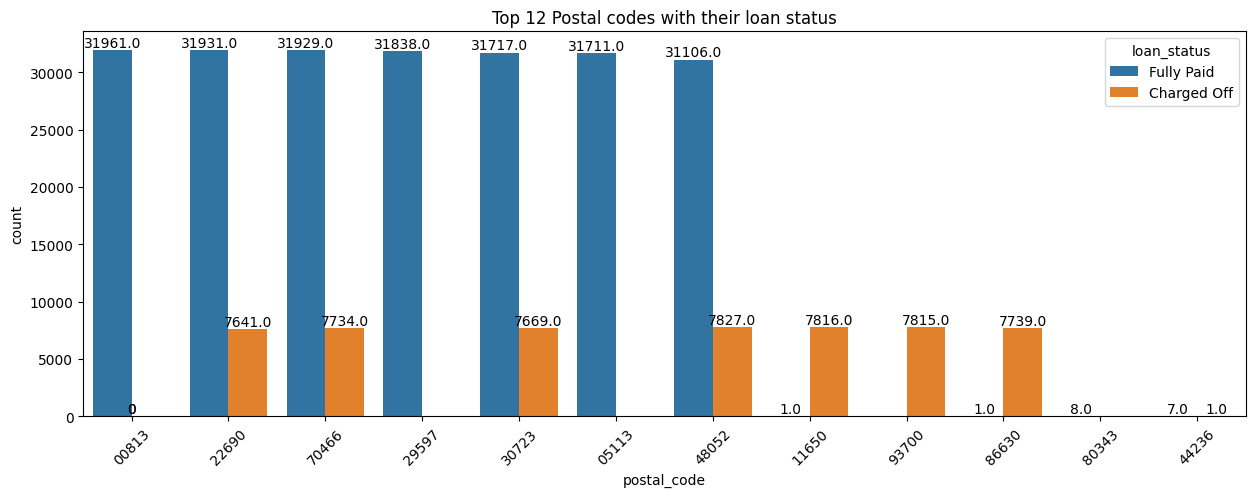

In [ ]:
df_postal_code_loan_status = dataset[['postal_code','loan_status']]
df_postal_code_loan_status.set_index('postal_code', inplace=True)
df_postal_code_loan_status

df_postal_code_loan_status_filtered = df_postal_code_loan_status.loc[top_12_potasl_codes_index, :]
df_postal_code_loan_status_filtered = df_postal_code_loan_status_filtered.reset_index()
df_postal_code_loan_status_value_counts = df_postal_code_loan_status_filtered[['postal_code','loan_status']].value_counts()
df_postal_code_loan_status_value_counts = df_postal_code_loan_status_value_counts.reset_index()


plt.figure(figsize=(15,5))
ax = sns.barplot(x='postal_code', y='count', hue='loan_status', data=df_postal_code_loan_status_value_counts)
sns_annotation(ax)
plt.title('Top 12 Postal codes with their loan status')
plt.xticks(rotation=45)
plt.show()

<font color='blue'>Observation:</font>   

*   For most postal codes, the majority of loans are "Fully Paid," indicating a high repayment rate across these areas.
*   Some postal codes (e.g., 22690, 70466, 48052) show relatively high numbers of "Charged Off" loans, indicating areas with higher default rates.
*   The numbers for "Charged Off" loans range from around 7,641 to 7,827, suggesting these areas may have a higher risk for loan defaults.
* Postal code 00813 has only "Fully Paid" loans, which could indicate a low-risk area for lending or limited data for defaults in this region.
* Postal codes with higher "Charged Off" rates could be considered riskier areas for loan approvals. Stakeholders might use this data for targeted risk assessment, setting more stringent credit requirements in high-default areas.


###<font color="cyne"><span><b>Handling 'title' Feature values Inconsistency</b></span></font>


In [ ]:
dataset['title'].value_counts().head(30)

title
Debt consolidation           152392
Credit card refinancing       51476
Home improvement              15245
Other                         12910
Debt Consolidation            11584
Major purchase                 4759
Consolidation                  3840
debt consolidation             3543
Business                       2947
Debt Consolidation Loan        2859
Medical expenses               2733
Car financing                  2135
Credit Card Consolidation      1768
Vacation                       1715
Moving and relocation          1688
consolidation                  1594
Personal Loan                  1568
Consolidation Loan             1295
Home Improvement               1265
Home buying                    1183
Credit Card Refinance          1094
Credit Card Payoff             1052
Consolidate                     916
Personal                        857
Loan                            750
Credit Card Loan                626
Freedom                         579
consolidate                     562
personal                        550
personal loan                   540
Name: count, dtype: int64

<font color='blue'>Observation:</font>   

From the above we can observe there is no proper format for the values, some values have first letter with upper case where as some other does not and also some values are repeated with the same name but different format, These values should be handled properly.

In [ ]:
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x:x.strip())
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x:x.lower())
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt consolidation' if 'consol' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'credit card refinancing' if 'refi' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'personal' if 'personal' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'personal' if 'my' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'personal' if 'mine' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt payoff' if 'off' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt payoff' if 'free' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt payoff' if 'debt' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt payoff' if 'pay' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'home' if 'home' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'home' if 'house' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'wedding' if 'wedding' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'wedding' if 'ring' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'car' if 'car' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'business' if 'business' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'other' if 'other' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'medical' if 'medical' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'moving and relocation' if 'moving' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'major purchase' if 'major purchase' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'lending club' if 'lending club' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'bills' if 'bill' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'pool' if 'pool' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'vacation' if 'vacation' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'auto' if 'auto' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'fresh start' if 'new' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'credit' if 'cc' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'green' if 'green' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'credit' if 'credit' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'lending club' if 'lending' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'taxes' if 'taxes' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'motorcycle' if 'motorcycle' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'remodel' if 'remodel' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'moving and relocation' if 'relocation' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'fresh start' if 'start' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'improvement' if 'improvement' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'relief' if 'peace' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debt payoff' if 'back' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'debit card' if 'dc' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'clean' if 'clean' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'loan' if 'loan' in x else x)
dataset.loc[:,'title'] = dataset.loc[:,'title'].apply(lambda x: 'lower interest rate' if 'lower interest' in x else x)
dataset['title'].value_counts().head(40)

title
debt payoff              228829
car                       67499
home                      22423
other                     13219
personal                   8941
loan                       6011
major purchase             5215
business                   4552
medical                    3673
moving and relocation      2570
vacation                   2173
wedding                    2129
fresh start                1968
credit                     1875
lending club               1036
pool                        835
bills                       818
auto                        346
relief                      329
motorcycle                  300
improvement                 289
remodel                     286
clean                       234
green                       226
debit card                  172
help                        162
taxes                       135
lower interest rate         121
money                        82
roof                         68
boat                         67
hot tub                      58
discover                     55
kitchen                      53
truck                        52
investment                   52
future                       43
breathing room               40
purchase                     38
all in one                   35
Name: count, dtype: int64

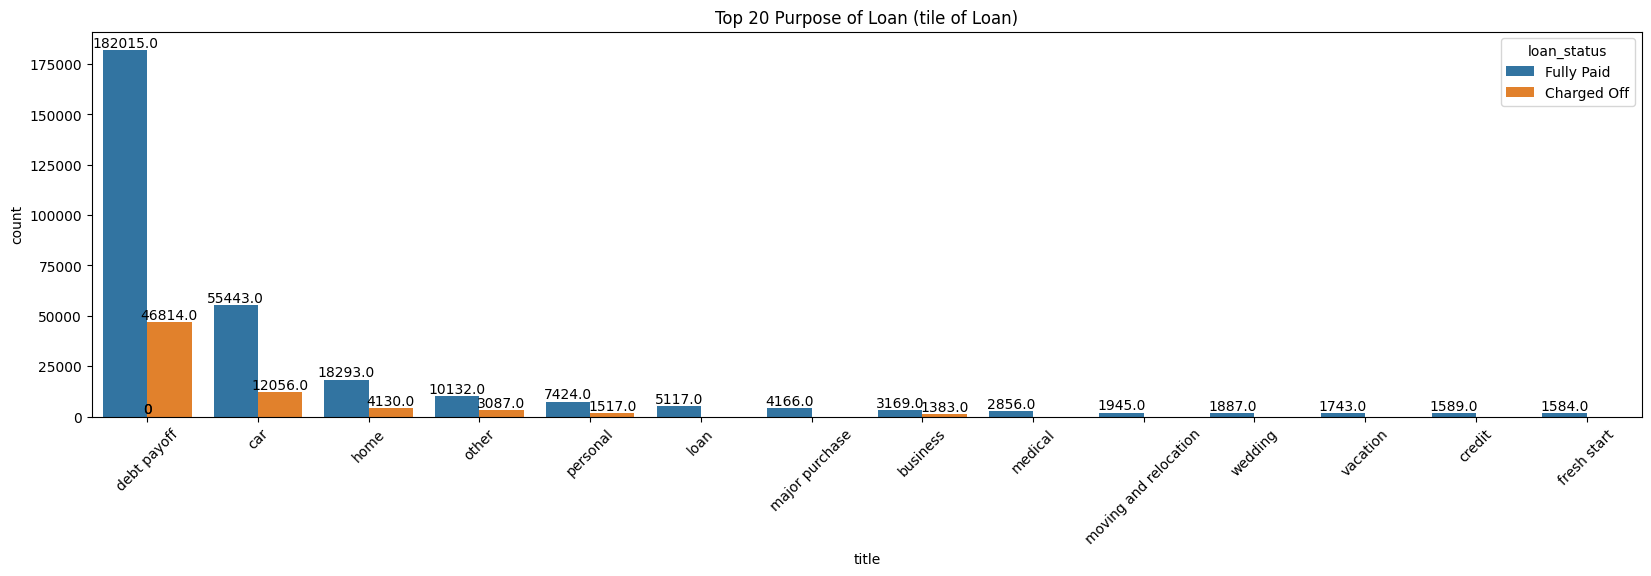

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='title', y='count', hue='loan_status', data=dataset[['title', 'loan_status']].value_counts().reset_index().head(20))
sns_annotation(ax)
plt.title('Top 20 Purpose of Loan (title of Loan)')
plt.xticks(rotation=45)
plt.show()

<font color = 'blue'>Observation :  
  </font> Most of the loans are taken for the purpose of debt payoff.

###<font color="cyne"><span><b>Handling 'emp_title' Feature values Inconsistency</b></span></font>


In [ ]:
dataset.loc[:,'emp_title'] = dataset.loc[:,'emp_title'].apply(lambda x:x.strip())
dataset.loc[:,'emp_title'] = dataset.loc[:,'emp_title'].apply(lambda x:x.lower())
dataset['emp_title'].value_counts().head(20)

emp_title
unknown title         22668
manager                5811
teacher                5532
supervisor             2789
registered nurse       2713
sales                  2490
driver                 2357
owner                  2220
rn                     2121
project manager        1822
office manager         1694
general manager        1530
truck driver           1353
director               1242
engineer               1220
police officer         1094
vice president         1034
sales manager          1008
operations manager     1006
store manager           984
Name: count, dtype: int64

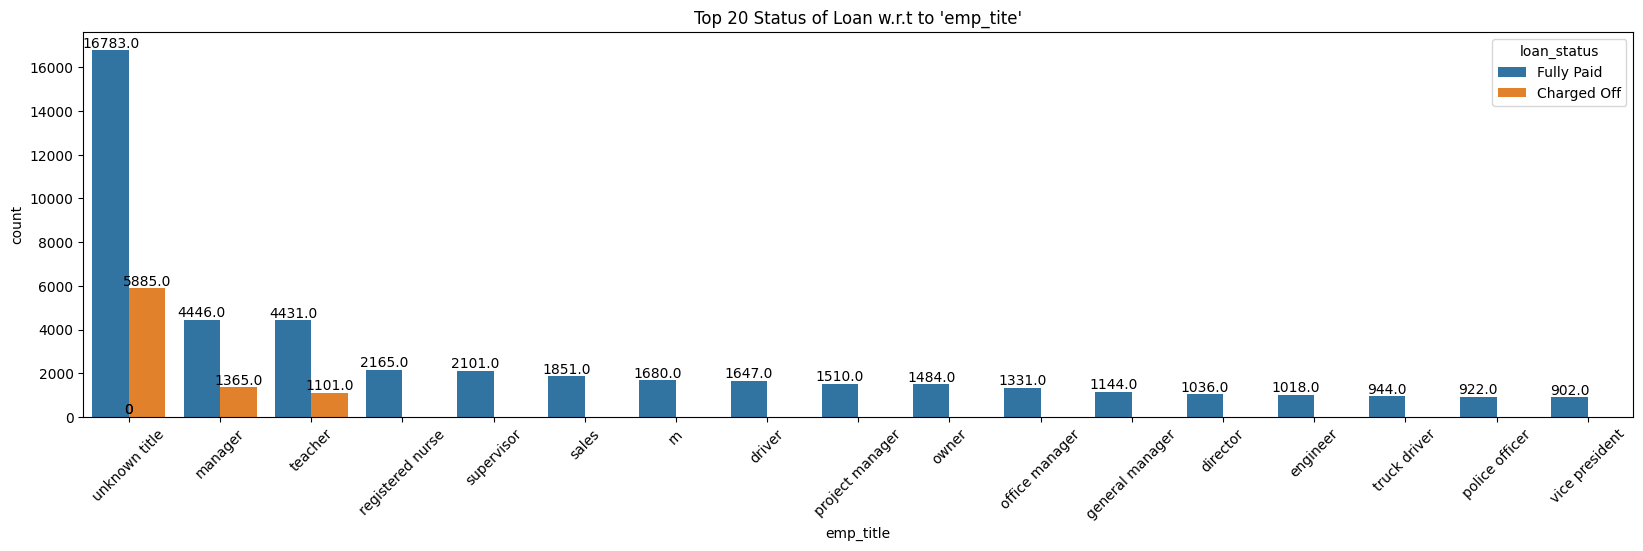

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='emp_title', y='count', hue='loan_status', data=dataset[['emp_title', 'loan_status']].value_counts().reset_index().head(20))
sns_annotation(ax)
plt.title("Top 20 Status of Loan w.r.t to 'emp_tite'")
plt.xticks(rotation=45)
plt.show()

<font color = 'blue'>Observation :  
  </font> Most of the loans are taken by managers and teachers.

##<font color="#1b6344"><span><b>Date and Time Features Handling</b></span>
*   Convert Date Columns
*   Extract Date Features
*   Calculate Time Deltas




In [ ]:
dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'postal_code'],
      dtype='object')

In [ ]:
dataset['issue_d'] = pd.to_datetime(dataset['issue_d'])
dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'])

<ipython-input-77-f9590e77fd32>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['issue_d'] = pd.to_datetime(dataset['issue_d'])
<ipython-input-77-f9590e77fd32>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'])


###<font color="cyne"><span><b>Handling 'issue_d' (Loan Issue Date) Feature</b></span></font>

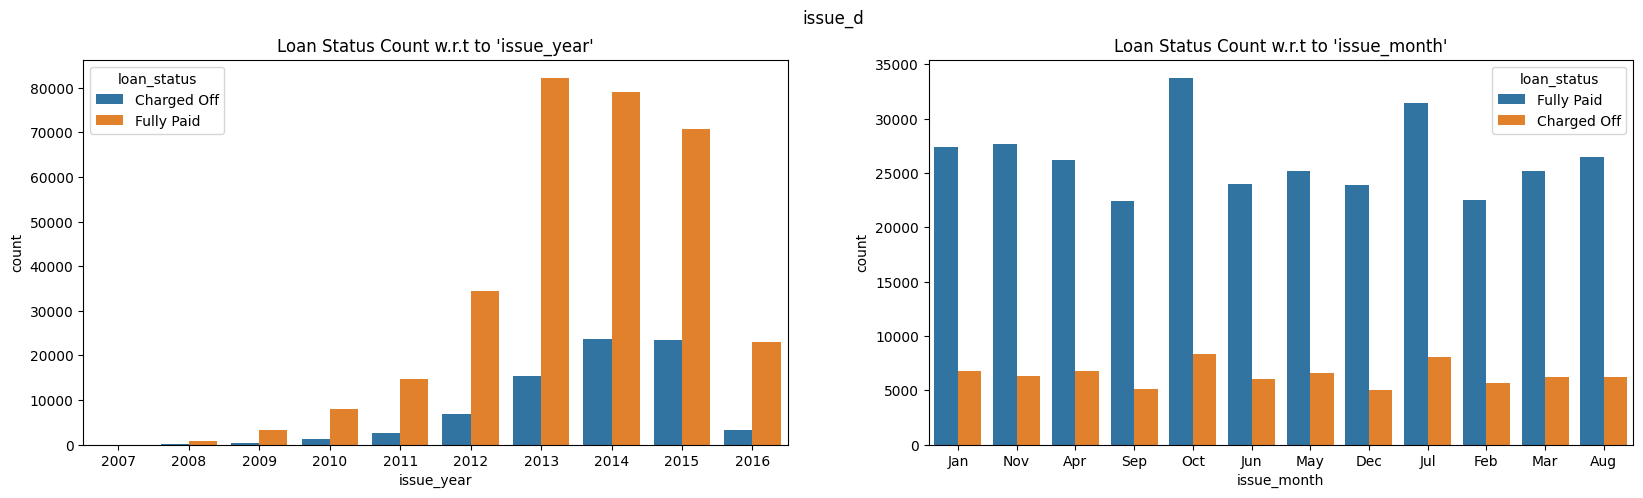

In [ ]:
dataset['issue_year']= pd.to_datetime(dataset['issue_d']).dt.year
dataset['issue_month'] = pd.to_datetime(dataset['issue_d']).dt.strftime('%b')

plt.figure(figsize = (20,5))
plt.suptitle('issue_d')

plt.subplot(1,2,1)
plt.title("Loan Status Count w.r.t to 'issue_year'")
sns.countplot(x='issue_year', data=dataset, hue='loan_status')

plt.subplot(1,2,2)
plt.title("Loan Status Count w.r.t to 'issue_month'")
sns.countplot(x='issue_month', data=dataset, hue='loan_status')
plt.show()

<font color = 'blue'>Observation :  
  </font> Most of the loans are issued during 2013 to 2015 and in Oct and Jul months.

###<font color="cyne"><span><b>Handling 'earliest_cr_line_year' (Initial Loan issue date) Feature</b></span></font>

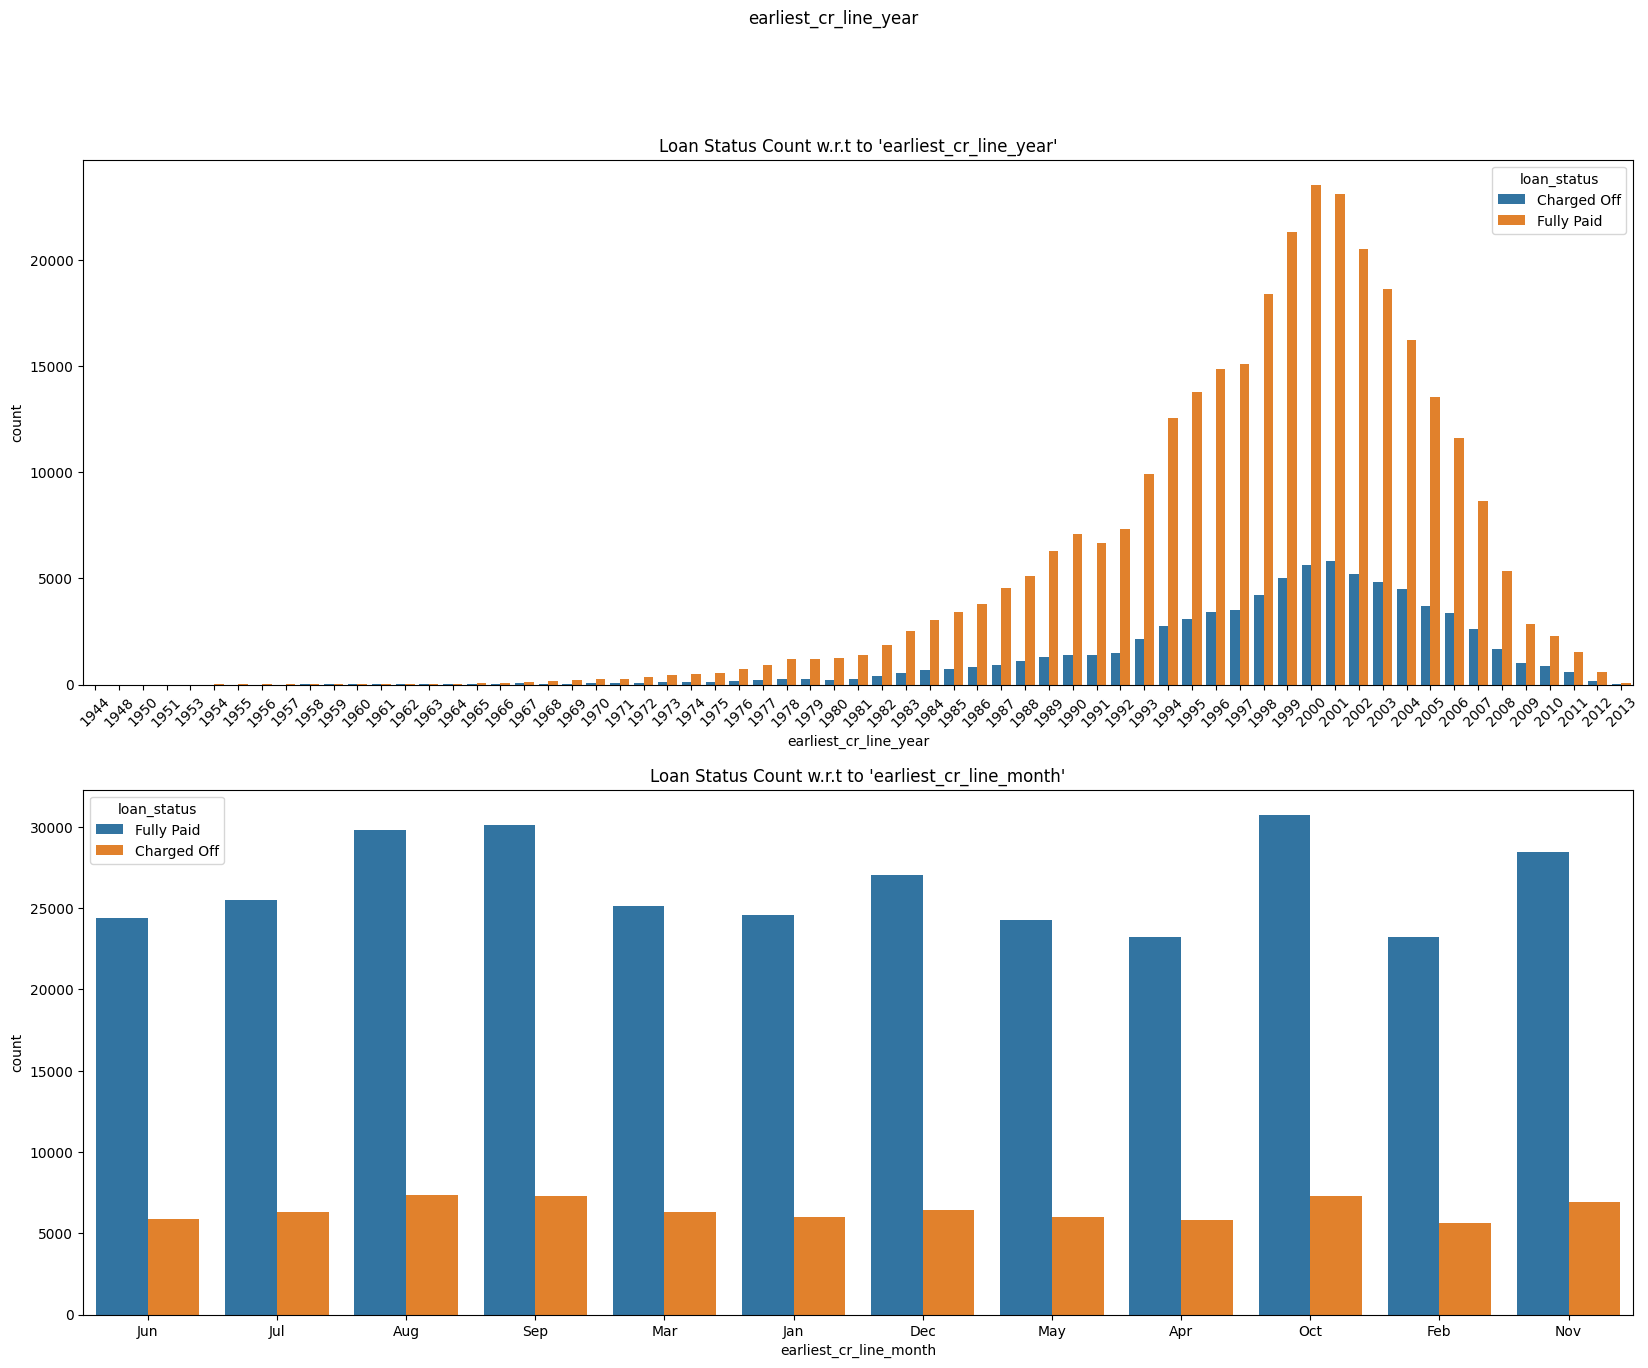

In [ ]:
dataset['earliest_cr_line_year']= pd.to_datetime(dataset['earliest_cr_line']).dt.year
dataset['earliest_cr_line_month'] = pd.to_datetime(dataset['earliest_cr_line']).dt.strftime('%b')

plt.figure(figsize = (20,15))
plt.suptitle('earliest_cr_line_year')

plt.subplot(2,1,1)
plt.title("Loan Status Count w.r.t to 'earliest_cr_line_year'")
sns.countplot(x='earliest_cr_line_year', data=dataset, hue='loan_status')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.title("Loan Status Count w.r.t to 'earliest_cr_line_month'")
sns.countplot(x='earliest_cr_line_month', data=dataset, hue='loan_status')
plt.show()

In [ ]:
dataset.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)
dataset.shape

(393464, 28)

##<font color="#1b6344"><span><b>Final Sanity Checks</b></span>
*   Recheck Missing Values
*   Visualize Distributions
*   Check for Data Leakage



In [ ]:
dataset.head()

loan_amnt        term  int_rate grade sub_grade                emp_title  \
0    10000.0   36 months     11.44     B        B4                marketing   
1     8000.0   36 months     11.99     B        B5           credit analyst   
2    15600.0   36 months     10.49     B        B3             statistician   
3     7200.0   36 months      6.49     A        A2          client advocate   
4    24375.0   60 months     17.27     C        C5  destiny management inc.   

  emp_length home_ownership  annual_inc verification_status  loan_status  \
0  10+ years           RENT   11.669938        Not Verified   Fully Paid   
1    4 years       MORTGAGE   11.082158        Not Verified   Fully Paid   
2   < 1 year           RENT   10.670303     Source Verified   Fully Paid   
3    6 years           RENT   10.896758        Not Verified   Fully Paid   
4    9 years       MORTGAGE   10.915107            Verified  Charged Off   

              purpose        title       dti  open_acc  pub_rec  revol_bal  \
0            vacation     vacation  3.304686      16.0      0.0  10.501500   
1  debt_consolidation  debt payoff  3.137666      17.0      0.0   9.910066   
2         credit_card          car  2.623944      13.0      0.0   9.391661   
3         credit_card          car  1.506135       6.0      0.0   8.607582   
4         credit_card          car  3.553918      13.0      0.0  10.109892   

   revol_util  total_acc initial_list_status application_type  mort_acc  \
0        41.8       25.0                   w       INDIVIDUAL       0.0   
1        53.3       27.0                   f       INDIVIDUAL       3.0   
2        92.2       26.0                   f       INDIVIDUAL       0.0   
3        21.5       13.0                   f       INDIVIDUAL       0.0   
4        69.8       43.0                   f       INDIVIDUAL       1.0   

   pub_rec_bankruptcies postal_code  issue_year issue_month  \
0                   0.0       22690        2015         Jan   
1                   0.0       05113        2015         Jan   
2                   0.0       87025        2015         Jan   
3                   0.0       00813        2014         Nov   
4                   0.0       11650        2013         Apr   

   earliest_cr_line_year earliest_cr_line_month  
0                   1990                    Jun  
1                   2004                    Jul  
2                   2007                    Aug  
3                   2006                    Sep  
4                   1999                    Mar

In [ ]:
dataset.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                     0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
postal_code               0
issue_year                0
issue_month               0
earliest_cr_line_year     0
earliest_cr_line_month    0
dtype: int64

<font color = 'blue'>Observation :  
  </font> Missing values were handled appropriately to minimize their impact on model accuracy. Techniques such as [imputation or deletion] were used based on the nature and distribution of the missing data.

<Figure size 640x480 with 0 Axes>

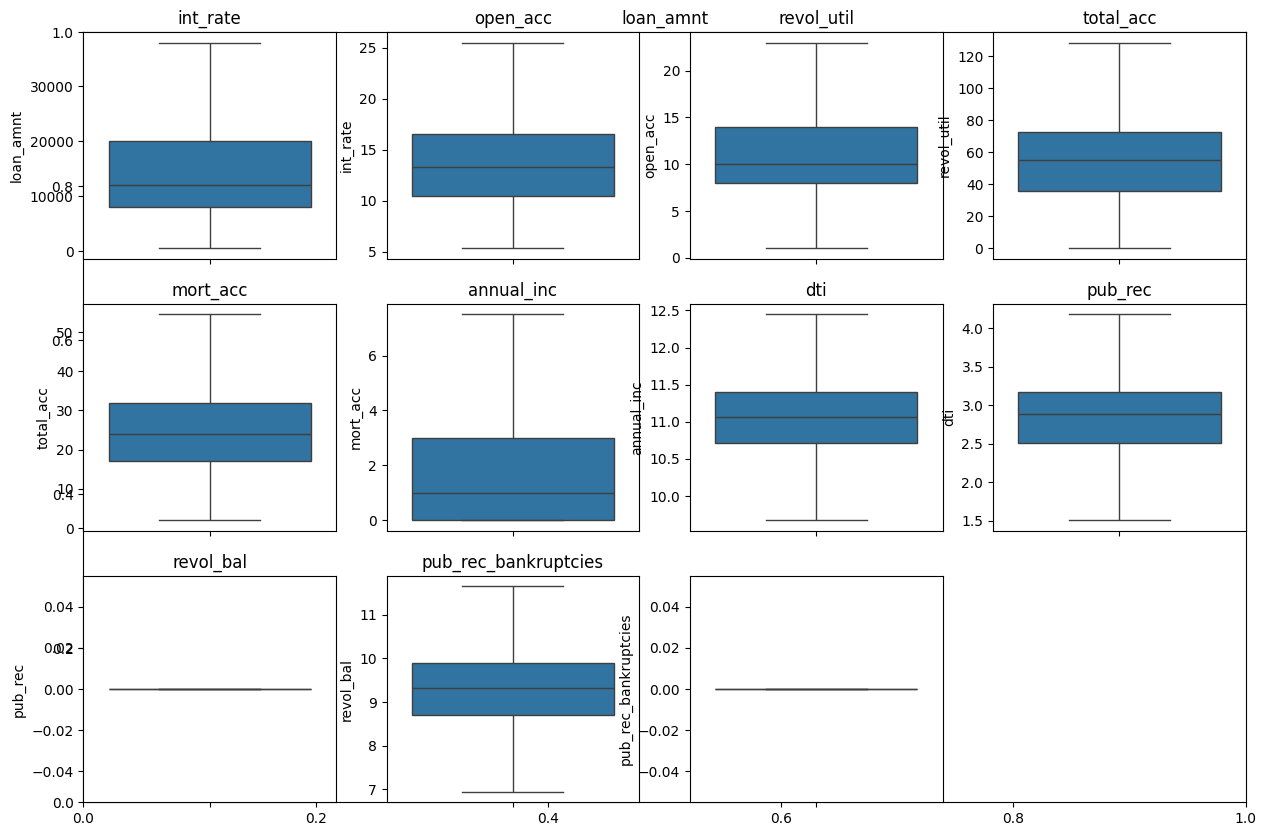

In [ ]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.suptitle('Outliers Sanity Check For All the Numercial Features')
plt.figure(figsize=(15,10))
for i in range(len(otliers_treated_numeric_features)):
  plt.title(otliers_treated_numeric_features[i])
  plt.subplot(3,4,i+1)
  sns.boxplot(data=dataset, y=otliers_treated_numeric_features[i])
plt.show()

<font color = 'blue'>Observation :  
  </font> Outliers are identified and appropriately handled to prevent skewing the model’s performance.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393464 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               393464 non-null  float64
 1   term                    393464 non-null  object 
 2   int_rate                393464 non-null  float64
 3   grade                   393464 non-null  object 
 4   sub_grade               393464 non-null  object 
 5   emp_title               393464 non-null  object 
 6   emp_length              393464 non-null  object 
 7   home_ownership          393464 non-null  object 
 8   annual_inc              393464 non-null  float64
 9   verification_status     393464 non-null  object 
 10  loan_status             393464 non-null  object 
 11  purpose                 393464 non-null  object 
 12  title                   393464 non-null  object 
 13  dti                     393464 non-null  float64
 14  open_acc                3

##<font color="#1b6344"><span><b>Checking Target Class Imbalance</b></span>
*   Check Class Distribution






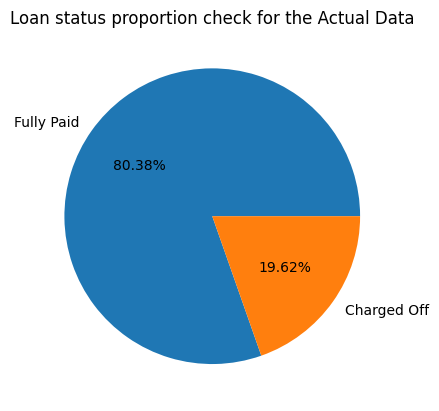

loan_status
Fully Paid     316270
Charged Off     77194
Name: count, dtype: int64

In [ ]:
loan_satus_count = dataset['loan_status'].value_counts()
plt.pie(loan_satus_count, autopct='%0.2f%%', labels=['Fully Paid', 'Charged Off'])
plt.title('Loan status proportion check for the Actual Data')
plt.show()
loan_satus_count

<font color = 'blue'>Observation :</font>

From the above plot it's clear that dataset is imbalance w.r.t target.

##<font color="#1b6344"><span><b>Saving the processed data to pickle file</b></span>

In [ ]:
X = dataset.drop('loan_status', axis=1)
y= dataset.loc[:,'loan_status']

with open("loantap.pkl", "wb") as f:
    pickle.dump((X, y), f)

#<font color="#662f96"><span><b>Data Pre-proc</b></span></font><font color="#943699" ><span><b>essing Pipeline:</b></span></font>

* <font color = 'green'>train_test_val_split :</font> Splits the processed data into three parts: training, validation, and test sets..
* <font color = 'green'>one_hot_encoding :</font> one-hot encoding creates separate binary features for each unique category and is often suitable for a small number of categories.
* <font color = 'green'>ordinal_encoding :</font> ordinal encoding is suitable when the categories have a ranked order.
* <font color = 'green'>target_feature_encoding:</font> Converting the target variable (label) into a numerical format if it’s categorical, to make it suitable for model training.
* <font color = 'green'>nominal_encoding:</font> Encoding technique used for categorical features without any inherent order, typically using methods like one-hot encoding to represent each category as a separate binary feature.
* <font color = 'green'>fix_imbalance_data:</font> Techniques used to address class imbalance in the dataset, such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE.
* <font color = 'green'>scaler_min_max:</font> Scales the data using the Min-Max Scaling techinque.
* <font color = 'green'>encode_scale_data:</font> Performs all the above operarions in one go.

In [ ]:
class DataPreprocessing:
  def __init__(self, X, y, ordinal_columns=None, nominal_columns=None, one_hot_encoding_columns=None, target_values_dict=None, val_split=False):
        self.X = X
        self.y = y
        self.ordinal_columns = ordinal_columns
        self.nominal_columns = nominal_columns
        # self.numerical_columns  = X.columns
        self.target_values_dict = target_values_dict
        self.val_split = val_split
        self.one_hot_encoding_columns = one_hot_encoding_columns
        self.data_train = None
        self.data_test = None
        self.data_val = None
        self.data_target_train = None
        self.data_target_test = None
        self.data_target_val = None

  def train_test_val_split(self):
    if self.val_split == True:
      X_tr_cv, self.data_test, y_tr_cv, self.data_target_test = train_test_split(self.X, self.y, test_size=0.2, random_state=1)
      self.data_train, self.data_val, self.data_target_train, self.data_target_val  = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
    else:
       self.data_train, self.data_test, self.data_target_train,self.data_target_test =  train_test_split(self.X, self.y, test_size=0.3, random_state=42)

  def one_hot_encoding(self, prefix=None, dtype='int'):
    for i in self.one_hot_encoding_columns:
      data_train_dummies = pd.get_dummies(self.data_train[i], prefix=prefix, dtype=dtype)
      self.data_train = pd.concat([self.data_train, data_train_dummies], axis=1).drop(columns=i)

      data_test_dummies = pd.get_dummies(self.data_test[i], prefix=prefix, dtype=dtype)
      self.data_test = pd.concat([self.data_test, data_test_dummies], axis=1).drop(columns=i)

      if self.val_split == True:
          data_val_dummies = pd.get_dummies(self.data_val[i], prefix=prefix, dtype=dtype)
          self.data_val = pd.concat([self.data_val, data_val_dummies], axis=1).drop(columns=i)

  def ordinal_encoding(self):

    encoder = OrdinalEncoder(categories=[self.ordinal_columns[col] for col in self.ordinal_columns.keys()])
    data_train_encoded = encoder.fit_transform(self.data_train[self.ordinal_columns.keys()])
    self.data_train.loc[:,self.ordinal_columns.keys()] = data_train_encoded

    data_test_encoded = encoder.transform(self.data_test[self.ordinal_columns.keys()])
    self.data_test.loc[:,self.ordinal_columns.keys()] = data_test_encoded

    if self.val_split == True:
      data_val_encoded = encoder.transform(self.data_val[self.ordinal_columns.keys()])
      self.data_val.loc[:,self.ordinal_columns.keys()] = data_val_encoded

  def target_feature_encoding(self):
    self.data_target_train = self.data_target_train.map(self.target_values_dict)
    self.data_target_test = self.data_target_test.map(self.target_values_dict)
    if self.val_split == True:
      self.data_target_val = self.data_target_val.map(self.target_values_dict)

  def nominal_encoding(self):
    target_encoder = ce.TargetEncoder()
    data_train_encoded_col = target_encoder.fit_transform(self.data_train[self.nominal_columns], self.data_target_train)
    self.data_train[self.nominal_columns] = data_train_encoded_col

    data_test_encoded_col = target_encoder.transform(self.data_test[self.nominal_columns])
    self.data_test[self.nominal_columns] = data_test_encoded_col

    if self.val_split == True:

      data_val_encoded_col = target_encoder.transform(self.data_val[self.nominal_columns])
      self.data_val[self.nominal_columns] = data_val_encoded_col

  def fix_imbalance_data(self):
    smote = SMOTE(random_state=42)
    self.data_train, self.data_target_train =  smote.fit_resample(self.data_train, self.data_target_train)


  def scaler_min_max(self):
    scaler  = MinMaxScaler()
    data_train_scaled  = scaler.fit_transform(self.data_train)
    self.data_train = pd.DataFrame(data_train_scaled, columns=self.data_train.columns)

    data_test_scaled = scaler.transform(self.data_test)
    self.data_test = pd.DataFrame(data_test_scaled, columns=self.data_train.columns)

    if self.val_split == True:
      data_val_scaled = scaler.transform(self.data_val)
      self.data_val = pd.DataFrame(data_val_scaled, columns=self.data_train.columns)

  def encode_scale_data(self):
      self.train_test_val_split()
      self.one_hot_encoding()
      self.ordinal_encoding()
      self.target_feature_encoding()
      self.nominal_encoding()
      self.fix_imbalance_data()
      self.scaler_min_max()

      return self.data_train, self.data_test, self.data_val, self.data_target_train, self.data_target_test, self.data_target_val

##<font color="#1b6344"><span><b>Splitting(Train,Test), Encoding, Balancing and Scaling the data</b></font>

In [ ]:
X = dataset.drop('loan_status', axis=1)
y= dataset.loc[:,'loan_status']

ordinal_columns = {
    'term': [' 36 months', ' 60 months'],
    'grade': ['G', 'F', 'E', 'D', 'C', 'B', 'A'],
    'sub_grade' : ['G7', 'G6', 'G5', 'G4', 'G3', 'G2', 'G1',
                    'F7', 'F6', 'F5', 'F4', 'F3', 'F2', 'F1',
                    'E7', 'E6', 'E5', 'E4', 'E3', 'E2', 'E1',
                    'D7', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1',
                    'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1',
                    'B7', 'B6', 'B5', 'B4', 'B3', 'B2', 'B1',
                    'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1'],
    'emp_length' : ['UnKnown Length','< 1 year' , '1 year', '2 years', '3 years',
                    '4 years', '5 years', '6 years', '7 years',
                    '8 years', '9 years', '10+ years']}

nominal_columns = ['emp_title','home_ownership', 'verification_status',
                   'issue_year', 'issue_month', 'purpose','title',
                   'earliest_cr_line_year','earliest_cr_line_month',
                   'application_type', 'postal_code']

one_hot_encoding_columns = ['initial_list_status']

target_values_dict = {'Fully Paid': 1, 'Charged Off': 0}

preprocess_train_test = DataPreprocessing(X,y, ordinal_columns = ordinal_columns, nominal_columns=nominal_columns, one_hot_encoding_columns=one_hot_encoding_columns, target_values_dict=target_values_dict)

X_train, X_test, X_val, y_train, y_test, y_val = preprocess_train_test.encode_scale_data()

##<font color="#1b6344"><span><b>Sanity checks</b></font>




###<font color="cyne"><span><b>Shape of the data after spliting</b></font>

In [ ]:
print(Fore.BLUE, 'Shape of X_train :', Fore.BLACK, X_train.shape)
print(Fore.BLUE, 'Shape of X_test :', Fore.BLACK, X_test.shape)
print(Fore.BLUE, 'Shape of y_train :', Fore.BLACK, y_train.shape)
print(Fore.BLUE, 'Shape of y_test :', Fore.BLACK, y_test.shape)

 Shape of X_train :  (443440, 28)
 Shape of X_test :  (118040, 28)
 Shape of y_train :  (443440,)
 Shape of y_test :  (118040,)


<font color = 'blue'>Observation :  
  </font> Data has splitted into train and test.

###<font color="cyne"><span><b>Data Imbalance sanity check</b></span>

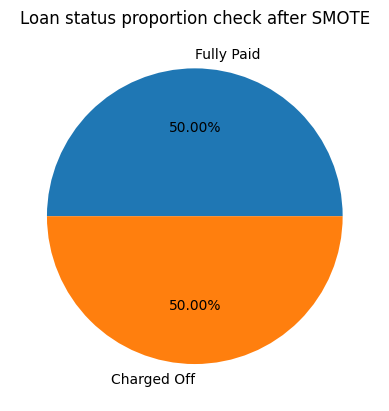

In [ ]:
y_train_value_counts = y_train.value_counts()
plt.pie(y_train_value_counts, autopct='%0.2f%%', labels=['Fully Paid', 'Charged Off'])
plt.title('Loan status proportion check after SMOTE')
plt.show()

<font color = 'blue'>Observation :  
  </font> After applying the SMOTE technique, the data is balanced

##<font color="cyne"><span><b>Encoded & Scaled data sanity check</b></span>

In [ ]:
X_train.head()

loan_amnt  term  int_rate     grade  sub_grade  emp_title  emp_length  \
0   0.146667   0.0  0.227566  0.833333   0.847826   0.698090    0.727273   
1   0.386667   0.0  0.655925  0.500000   0.478261   0.529982    0.181818   
2   0.626667   0.0  0.079326  1.000000   0.934783   0.698090    1.000000   
3   0.193333   1.0  0.287556  0.833333   0.804348   0.692663    1.000000   
4   0.215333   0.0  0.704016  0.500000   0.478261   0.698090    1.000000   

   home_ownership  annual_inc  verification_status   purpose     title  \
0        0.782515    0.355232             0.119112  0.515961  0.367332   
1        0.251778    0.228761             0.119112  0.515961  0.367332   
2        0.251778    0.840638             0.000000  0.753891  0.450936   
3        0.251778    0.625000             0.000000  0.515961  0.367332   
4        0.251778    0.273903             1.000000  0.515961  0.367332   

        dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0  0.162336  0.318182      0.0   0.383871    0.612928   0.114286   
1  0.682431  0.363636      0.0   0.578100    0.751558   0.438095   
2  0.323184  0.181818      0.0   0.663369    0.297508   0.095238   
3  0.605635  0.500000      0.0   0.581935    0.430685   0.990476   
4  0.702737  0.545455      0.0   0.496033    0.394860   0.723810   

   application_type  mort_acc  pub_rec_bankruptcies  postal_code  issue_year  \
0             0.695  0.133333                   0.0     0.761747    0.555556   
1             0.695  0.000000                   0.0     0.806314    0.555556   
2             0.695  0.000000                   0.0     1.000000    0.888889   
3             0.695  0.133333                   0.0     0.832672    0.333333   
4             0.695  0.000000                   0.0     0.800542    0.666667   

   issue_month  earliest_cr_line_year  earliest_cr_line_month    f    w  
0     0.175506               0.884058                0.671527  1.0  0.0  
1     0.243882               0.782609                0.319490  1.0  0.0  
2     0.122420               0.724638                0.400786  1.0  0.0  
3     0.243882               0.768116                0.387141  1.0  0.0  
4     0.674644               0.811594                0.479174  1.0  0.0

In [ ]:
X_test.head()

loan_amnt  term  int_rate     grade  sub_grade  emp_title  emp_length  \
0   0.120000   0.0  0.314824  0.833333   0.782609   0.532323    0.636364   
1   0.053333   0.0  0.380268  0.666667   0.695652   0.632533    1.000000   
2   0.386667   1.0  1.000000  0.166667   0.152174   0.525746    0.909091   
3   0.712000   0.0  0.314824  0.833333   0.782609   0.629488    1.000000   
4   0.066667   0.0  0.592464  0.666667   0.608696   0.529982    1.000000   

   home_ownership  annual_inc  verification_status   purpose     title  \
0        0.251778    0.413001             1.000000  0.753891  0.450936   
1        0.251778    0.413001             1.000000  0.798842  0.386293   
2        0.782515    0.740587             0.119112  0.515961  0.367332   
3        0.782515    0.523902             0.000000  0.515961  0.367332   
4        0.251778    0.490585             1.000000  0.515961  0.367332   

        dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0  0.444506  0.272727      0.0   0.396994    0.599688   0.247619   
1  0.782835  0.681818      0.0   0.516797    0.220405   0.800000   
2  0.331822  0.363636      0.0   0.298409    0.556075   0.590476   
3  0.652505  0.318182      0.0   0.629365    0.545171   0.342857   
4  0.547653  0.363636      0.0   0.538197    0.676791   0.457143   

   application_type  mort_acc  pub_rec_bankruptcies  postal_code  issue_year  \
0             0.695  0.000000                   0.0     1.000000    0.777778   
1             0.695  0.533333                   0.0     0.808685    0.777778   
2             0.695  0.400000                   0.0     0.000000    0.666667   
3             0.695  0.400000                   0.0     0.806314    0.777778   
4             0.695  0.000000                   0.0     0.800542    0.666667   

   issue_month  earliest_cr_line_year  earliest_cr_line_month    f    w  
0     0.255613               0.840580                0.319490  1.0  0.0  
1     0.674644               0.710145                0.319490  0.0  1.0  
2     0.669260               0.826087                0.261247  1.0  0.0  
3     0.078920               0.869565                0.000000  0.0  1.0  
4     0.175506               0.782609                0.479174  0.0  1.0

In [ ]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
y_test.head()

NameError: name 'y_test' is not defined

<font color = 'blue'>Observation :  
  </font>
      Data encoded and scaled properly.

#<font color="#662f96"><span><b>Modelling using</b></span></font><font color="#943699" ><span><b> Lostistic Regression</b></span></font>

##<font color="#1b6344"><span><b>Detecting Multicollinearity with VIF</b></span></font>

In [ ]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4                sub_grade  891.90
18        application_type  532.25
3                    grade  508.63
2                 int_rate   86.53
24   earliest_cr_line_year   73.61
11                   title   38.48
22              issue_year   33.01
10                 purpose   32.03
5                emp_title   23.09
15               revol_bal   18.42
8               annual_inc   17.45
13                open_acc   15.18
12                     dti   13.53
17               total_acc   13.25
16              revol_util   11.81
21             postal_code    8.71
7           home_ownership    7.98
0                loan_amnt    7.72
25  earliest_cr_line_month    4.86
26                       f    4.55
6               emp_length    4.46
27                       w    3.29
19                mort_acc    2.96
23             issue_month    2.68
1                     term    2.43
9      verification_status    1.94
14                 pub_rec     NaN
20    pub_rec_bankruptcies     NaN

<font color = 'blue'>Observation :  
  </font>
      From the analysis, we observe that most features have high VIF values, indicating a high degree of multicollinearity. This suggests that many features may be explaining the target variable in a similar way, allowing us to drop some of them to reduce redundancy and improve model interpretability.

In [ ]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

X_train_copy = X_train.copy()

def calculate_vif(X_train_copy):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train_copy.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_copy.values, i) for i in range(X_train_copy.shape[1])]
    return vif_data

threshold = 5
while True:
    vif_data = calculate_vif(X_train_copy)
    high_vif_features = vif_data[vif_data["VIF"] > threshold]

    if high_vif_features.empty:
        break

    feature_to_remove = high_vif_features.sort_values("VIF", ascending=False).iloc[0]["feature"]
    print(Fore.RED+f"Removing feature '{feature_to_remove}' with VIF: {high_vif_features['VIF'].max()}")
    X_train_copy = X_train_copy.drop(columns=[feature_to_remove])

    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_copy, y_train)
    y_pred = model.predict(X_test[X_train_copy.columns])
    print(Fore.BLUE+classification_report(y_test, y_pred))

Removing feature 'sub_grade' with VIF: 891.9019159664966
              precision    recall  f1-score   support

           0       0.56      0.47      0.51     23490
           1       0.87      0.91      0.89     94550

    accuracy                           0.82    118040
   macro avg       0.72      0.69      0.70    118040
weighted avg       0.81      0.82      0.82    118040

Removing feature 'application_type' with VIF: 367.21834344103064
              precision    recall  f1-score   support

           0       0.56      0.47      0.51     23490
           1       0.87      0.91      0.89     94550

    accuracy                           0.82    118040
   macro avg       0.72      0.69      0.70    118040
weighted avg       0.81      0.82      0.82    118040

Removing feature 'earliest_cr_line_year' with VIF: 65.57911103691127
              precision    recall  f1-score   support

           0       0.56      0.47      0.51     23490
           1       0.87      0.91      0.89   

<font color='blue'>Observation :</font>

Following are the Features that can be dropped
* sub_grade
* application_type
*   earliest_cr_line_year
* title
* grade
* issue_year
*   emp_title
*   revol_bal
* annual_inc
*   purpose
*   open_acc
*dti
* home_ownership

Above features have high multicolinearity.We can clearly see that the precision, recall accuracy values are better after dropping the above features.







##<font color="#1b6344"><span><b>Re-Loading the pickled data</b></span></font>

In [ ]:
with open("loantap.pkl", "rb") as f:
    X, y = pickle.load(f)

##<font color="#1b6344"><span><b>Splitting the data into 3 parts (train, test and validation)</b></span></font>

*  For Regularization, data need to be split into train, test & validation.
*  Regularization is performed on train and validation datasets.
* test data is used for checking the final scores.



In [ ]:
preprocess_train_test = DataPreprocessing(X,y, ordinal_columns = ordinal_columns, nominal_columns=nominal_columns, one_hot_encoding_columns=one_hot_encoding_columns, target_values_dict=target_values_dict, val_split=True)

X_train, X_test, X_val, y_train, y_test, y_val = preprocess_train_test.encode_scale_data()

##<font color="#1b6344"><span><b>Sanity checks</b></font>

###<font color="cyne"><span><b>Shape of the data after spliting</b></font>

In [ ]:
print(Fore.BLUE, 'Shape of X_train :', Fore.BLACK, X_train.shape)
print(Fore.BLUE, 'Shape of X_test :', Fore.BLACK, X_test.shape)
print(Fore.BLUE, 'Shape of X_val :', Fore.BLACK, X_val.shape)
print(Fore.BLUE, 'Shape of y_train :', Fore.BLACK, y_train.shape)
print(Fore.BLUE, 'Shape of y_test :', Fore.BLACK, y_test.shape)
print(Fore.BLUE, 'Shape of y_test :', Fore.BLACK, y_val.shape)

 Shape of X_train :  (379346, 28)
 Shape of X_test :  (78693, 28)
 Shape of X_val :  (78693, 28)
 Shape of y_train :  (379346,)
 Shape of y_test :  (78693,)
 Shape of y_test :  (78693,)


<font color = 'blue'>Observation :  
  </font> Data has splitted into train, test and validation.

###<font color="cyne"><span><b>Data Imbalance sanity check</b></span>

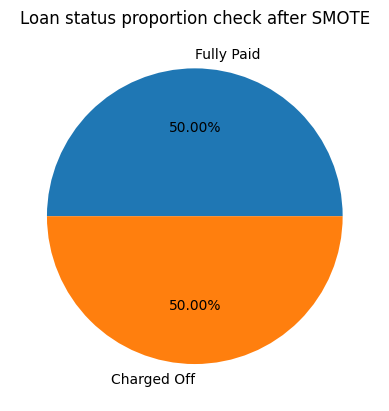

In [ ]:
y_train_value_counts = y_train.value_counts()
plt.pie(y_train_value_counts, autopct='%0.2f%%', labels=['Fully Paid', 'Charged Off'])
plt.title('Loan status proportion check after SMOTE')
plt.show()

<font color = 'blue'>Observation :  
  </font> After applying the SMOTE technique, the data is balanced

##<font color="cyne"><span><b>Encoded & Scaled data sanity check</b></span>

In [ ]:
X_train.head()

loan_amnt  term  int_rate     grade  sub_grade  emp_title  emp_length  \
0   0.289189   0.0  0.413981  0.666667   0.652174   0.426160    0.000000   
1   0.243243   0.0  0.081805  1.000000   0.978261   0.656957    1.000000   
2   0.858108   1.0  1.000000  0.000000   0.043478   0.656346    0.727273   
3   0.172973   0.0  0.365394  0.666667   0.673913   0.569514    0.181818   
4   0.648649   0.0  0.239465  0.833333   0.826087   0.569514    1.000000   

   home_ownership  annual_inc  verification_status   purpose     title  \
0        0.554261    0.202652             0.000000  0.718212  0.528282   
1        0.233494    0.332519             1.000000  0.513777  0.542226   
2        0.088762    0.591425             0.000000  0.499663  0.360841   
3        0.554261    0.413001             0.120196  0.734554  0.542226   
4        0.554261    0.453875             0.120196  0.513777  0.455422   

        dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0  0.704885  0.318182      0.0   0.541395    0.356698   0.419048   
1  0.548419  0.590909      0.0   0.504553    0.155763   0.590476   
2  0.715319  0.727273      0.0   0.602681    0.365265   0.590476   
3  0.535172  0.272727      0.0   0.054128    0.211838   0.190476   
4  0.594634  0.590909      0.0   0.637335    0.510903   0.438095   

   application_type  mort_acc  pub_rec_bankruptcies  postal_code  issue_year  \
0          0.723451  0.266667                   0.0     0.829009    1.000000   
1          0.723451  0.000000                   0.0     0.805078    0.666667   
2          0.723451  0.000000                   0.0     0.797714    0.777778   
3          0.723451  0.133333                   0.0     0.829009    0.888889   
4          0.723451  0.266667                   0.0     0.809434    0.777778   

   issue_month  earliest_cr_line_year  earliest_cr_line_month    f    w  
0     0.278979               0.333333                0.074710  0.0  1.0  
1     0.330002               0.739130                1.000000  1.0  0.0  
2     0.330002               0.826087                0.914513  0.0  1.0  
3     0.330002               0.927536                0.000000  1.0  0.0  
4     0.330002               0.695652                0.125740  0.0  1.0

In [ ]:
X_test.head()

loan_amnt  term  int_rate     grade  sub_grade  emp_title  emp_length  \
0   0.084459   0.0  0.655925  0.500000   0.521739   0.592231    0.454545   
1   0.378378   1.0  0.699058  0.333333   0.347826   0.592231    0.545455   
2   0.063514   0.0  0.495290  0.666667   0.630435   0.426160    0.000000   
3   0.648649   1.0  0.677739  0.333333   0.391304   0.426160    0.000000   
4   0.716216   1.0  0.454636  0.666667   0.630435   0.592231    0.636364   

   home_ownership  annual_inc  verification_status   purpose     title  \
0        0.088762    0.163004             1.000000  0.734554  0.455422   
1        0.088762    0.447376             0.000000  0.513777  0.455422   
2        0.088762    0.000000             0.000000  0.513777  0.455422   
3        0.554261    0.504167             0.000000  0.513777  0.455422   
4        0.554261    0.713410             0.120196  0.734554  0.542226   

        dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0  0.364194  0.227273      0.0   0.249506    0.591900   0.114286   
1  0.587289  0.545455      0.0   0.695858    0.595016   0.380952   
2  0.608091  0.181818      0.0   0.163472    0.404984   0.114286   
3  0.731971  0.590909      0.0   0.575577    0.535826   0.476190   
4  0.453495  0.727273      0.0   0.738615    0.495327   0.438095   

   application_type  mort_acc  pub_rec_bankruptcies  postal_code  issue_year  \
0          0.723451  0.000000                   0.0     0.803434    0.666667   
1          0.723451  0.133333                   0.0     0.829009    0.444444   
2          0.723451  0.000000                   0.0     0.809434    0.777778   
3          0.723451  0.133333                   0.0     0.000213    0.777778   
4          0.723451  0.666667                   0.0     1.000000    0.777778   

   issue_month  earliest_cr_line_year  earliest_cr_line_month    f    w  
0     0.330002               0.811594                0.183702  1.0  0.0  
1     0.676633               0.753623                0.566465  1.0  0.0  
2     0.278979               0.898551                0.000000  1.0  0.0  
3     0.000000               0.710145                1.000000  0.0  1.0  
4     0.237562               0.782609                0.566465  0.0  1.0

In [ ]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: loan_status, dtype: int64

<font color = 'blue'>Observation :  
  </font>
      Data encoded and scaled properly.

##<font color="#1b6344"><span><b>Hyper Parameter Tuning (Regularization)</b></font>

##<font color="cyne"><span><b>Regularization by Considering all the features</b></span>


In [ ]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  lr = LogisticRegression(C=1/la, max_iter=1000)
  lr.fit(X_train, y_train)
  train_score = accuracy(y_train, lr.predict(X_train))
  val_score = accuracy(y_val, lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

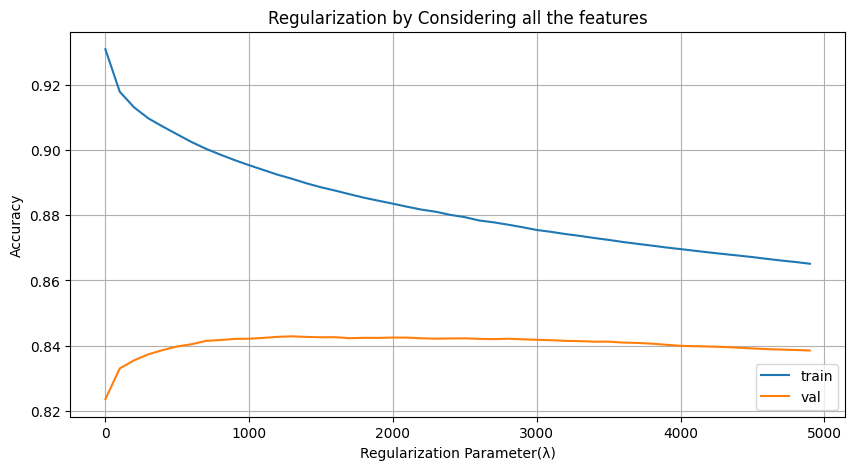

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.title('Regularization by Considering all the features')
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

<font color = 'blue'>Observation :  
  </font>
      From the above plot, when C = 1/1000, the test accuracy is good. Considering this for modelling.

In [ ]:
model = LogisticRegression(C=1/1000, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test[X_test.columns])  # Adjust test set features to match
print(Fore.BLUE+classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56     15346
           1       0.88      0.93      0.91     63347

    accuracy                           0.84     78693
   macro avg       0.75      0.71      0.73     78693
weighted avg       0.83      0.84      0.84     78693



<font color = 'blue'>Observation :  
  </font>
      Considering all the features, After Regularizations, the accuracy got improved from **82(pre-regularizaion) to 84(post-regularization).**

##<font color="cyne"><span><b>Regularization by dropping the redundant features</b></span>


In [ ]:
low_vif_features = ['loan_amnt', 'term', 'int_rate',   'emp_length',  'verification_status',
       'pub_rec',   'revol_util', 'total_acc',  'mort_acc',
       'pub_rec_bankruptcies', 'postal_code',  'issue_month',
        'earliest_cr_line_month', 'f', 'w']

In [ ]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  lr = LogisticRegression(C=1/la, max_iter=1000)
  lr.fit(X_train.loc[:,low_vif_features], y_train)
  train_score = accuracy(y_train, lr.predict(X_train.loc[:,low_vif_features]))
  val_score = accuracy(y_val, lr.predict(X_val.loc[:,low_vif_features]))
  train_scores.append(train_score)
  val_scores.append(val_score)

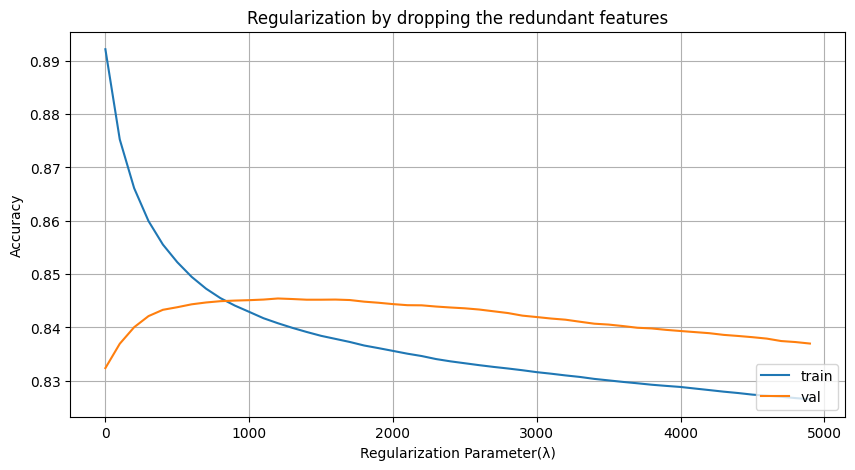

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.title('Regularization by dropping the redundant features')
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(C=1/800, max_iter=1000, class_weight='balanced')
model.fit(X_train.loc[:,low_vif_features], y_train)
y_pred = model.predict(X_test.loc[:,low_vif_features])  # Adjust test set features to match
print(Fore.BLUE+classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.48      0.55     15346
           1       0.88      0.94      0.91     63347

    accuracy                           0.85     78693
   macro avg       0.77      0.71      0.73     78693
weighted avg       0.84      0.85      0.84     78693



<font color = 'blue'>Observation :  
  </font>
      After Regularization, the accuracy got improved from **83(pre-regularization) to 85(post-regularization)**.

##<font color="#1b6344"><span><b>Saving the model in a pickle file</b></span></font>

In [ ]:
with open("loantap_model.pkl", "wb") as f_model:
    pickle.dump((model, X_test, y_test), f_model)

#<font color="#662f96"><span><b>Results </b></span></font><font color="#943699" ><span><b>Evaluation</b></span></font>

##<font color="#1b6344"><span><b>Classification Report (Confusion Matrix)</b></span></font>

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 7292,  8054],
       [ 3860, 59487]])

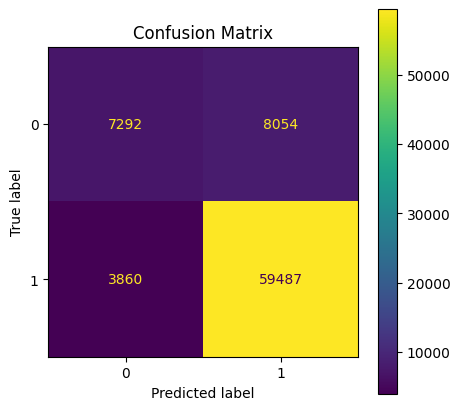

In [ ]:
# ax used here to control the size of confusion matrix
warnings.filterwarnings("ignore", category=RuntimeWarning)
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)
plt.title('Confusion Matrix')
plt.show()

##<font color="cyne"><span><b>Accuracy</b></span>

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.8486015274547927

##<font color="#1b6344"><span><b>ROC AUC Curve</b></span></font>

###<font color="cyne"><span><b>Probabilities of Class 1</b></span></font>

In [ ]:
probability = model.predict_proba(X_test.loc[:,low_vif_features])
probability

array([[0.42886566, 0.57113434],
       [0.53142854, 0.46857146],
       [0.41458608, 0.58541392],
       ...,
       [0.09632615, 0.90367385],
       [0.19374705, 0.80625295],
       [0.42612368, 0.57387632]])

In [ ]:
class1_propbabilities = probability[:,1]

In [ ]:
class1_propbabilities

array([0.57113434, 0.46857146, 0.58541392, ..., 0.90367385, 0.80625295,
       0.57387632])

###<font color="cyne"><span><b>ROC plot</b></span></font>

In [ ]:
fpr, tpr, thr = roc_curve(y_test,class1_propbabilities)

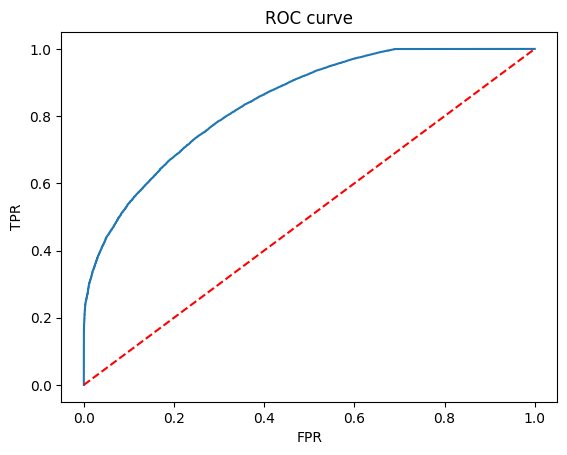

In [ ]:
plt.plot(fpr,tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##<font color="#1b6344"><span><b>Precision Recall Curve</b></span></font>

In [ ]:
roc_auc_score(y_test,class1_propbabilities)

0.8427925938866369

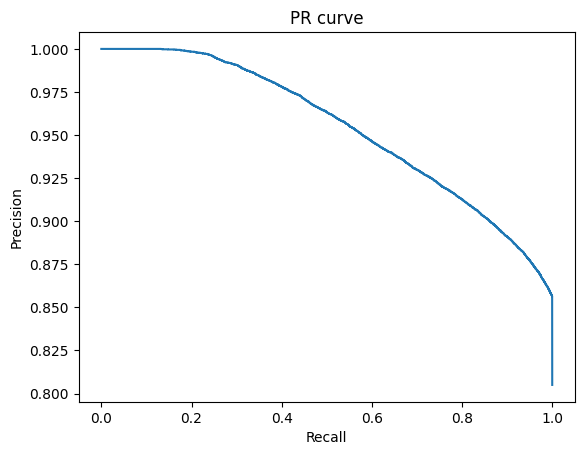

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, class1_propbabilities)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

#<font color="#662f96"><span><b>Actionable Insights </b></span></font><font color="#943699" ><span><b>& Recommendations</b></span></font>


##<font color=#1b6344><span><b>Insights:</b></span></font>

###<font color="cyne"><span><b>Precision-Recall Curve:</b></span></font>
* The PR curve shows high precision at low recall values, but precision decreases as recall increases.
* The model is precise when making fewer positive predictions, it sacrifices precision as it aims to capture more positive instances.
* This curve is useful in cases of class imbalance, where the positive class is the primary interest.


###<font color="cyne"><span><b>ROC Curve:</b></span></font>
* The ROC curve is well above the diagonal (random guess line), which implies the model is better than random at distinguishing between classes.
* A higher area under the ROC curve (AUC) would indicate strong discriminatory power.
Confusion Matrix:

###<font color="cyne"><span><b>Confusion Matrix:</b></span></font>

* The model is correctly predicting a significant number of true positives **(59,487)** but is also producing a high number of false positives **(8,054)** and false negatives **(3,860)**.
* The false positive rate is high, which could be a concern if the cost of false positives is high in our application.



###<font color="cyne"><span><b>Classification Report:</b></span></font>

* Fully Paid (Class 1, likely the positive class) has high precision **(0.88)** and high recall **(0.94)**, indicating good performance for this class.
* Charged Off (Class 0) has lower precision **(0.65)** and recall **(0.48)**, indicating that the model struggles with accurately identifying instances of this class.
* The weighted average F1-score is **0.84**, suggesting reasonable overall performance.

##<font color=#1b6344><span><b>Recommendations:</b></span></font>
*   Data patterns and business needs can evolve, so continuous monitoring will ensure the model stays effective. Need to set up a feedback loop to track performance metrics, such as precision, recall, and F1-score, and periodically need to retrain the model as new data is available.
*   Ensemble models like Random Forests or Gradient Boosting methods often handle complex data distributions better, especially with imbalanced data, leading to more robust predictions.Need to test ensemble models and compare their performance with the current model. If these models show improvement, should consider implementing them for production.
* Stakeholders should be aware of the model’s strengths and limitations, especially regarding false positives and false negatives.

